In [2]:
import numpy as np
import scipy.interpolate as sci
import scipy.integrate as integrate
from scipy.optimize import curve_fit
from scipy.interpolate import LinearNDInterpolator
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import maxwell
from matplotlib.ticker import FuncFormatter
import h5py
import matplotlib.pyplot as plt
from readers_auriga import readsubfind_auriga
from readers_auriga import readsnap_auriga
from numpy import linalg as la
from function_database import *
import time
import os
from matplotlib.colors import LogNorm
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from scipy.ndimage import gaussian_filter
from function_database_II import *
from scipy.interpolate import RegularGridInterpolator
from matplotlib.pyplot import figure
from astropy.io import fits



dm_mass = 49220.34305979

In [3]:

### Choose halo and path to datafiles


halo_to_analyze = 'V1'


datapathh = '/cosma5/data/durham/dc-vien1/'+ halo_to_analyze +'_JFactor_files/'
datapathh_flipped = '/cosma5/data/durham/dc-vien1/'+ halo_to_analyze +'_JFactor_files_flipped/'


In [4]:



output = np.load(datapathh + halo_to_analyze + '_gal_data_stuff.npz', allow_pickle = True)

DM_coords_galframe, DM_vels_galframe, subhalo_coords_galframe, subhalo_vels_galframe, ctr_mw_galframe, ctr_m31_galframe, subhalo_size_flag, subflags_mw_m31, groupflags_mw_m31, subgroupnum_mw_m31, groupnum_mw_m31, rmax_mw_m31, vmax_mw_m31, r200_mw, r200_m31, fof_mw, fof_m31, sub_mw, sub_m31 = output['arr_0'], output['arr_1'], output['arr_2'], output['arr_3'], output['arr_4'], output['arr_5'], output['arr_6'], output['arr_7'], output['arr_8'], output['arr_9'], output['arr_10'], output['arr_11'], output['arr_12'], output['arr_13'], output['arr_14'], output['arr_15'], output['arr_16'], output['arr_17'], output['arr_18']


ctr_mw_galframe = np.array([ctr_mw_galframe[0][0], ctr_mw_galframe[1][0], ctr_mw_galframe[2][0]])
ctr_m31_galframe = np.array([ctr_m31_galframe[0][0], ctr_m31_galframe[1][0], ctr_m31_galframe[2][0]])

subhalo_coords_galframe = np.array(list(zip(*[subhalo_coords_galframe[0], subhalo_coords_galframe[1], subhalo_coords_galframe[2]])))
DM_coords_galframe = np.array(list(zip(*[DM_coords_galframe[0], DM_coords_galframe[1], DM_coords_galframe[2]])))

subhalo_coords_galframe_pyr_dist_to_mw = np.sum(np.abs(subhalo_coords_galframe - ctr_mw_galframe)**2,axis=-1)**(1./2)
subhalo_coords_galframe_pyr_dist_to_m31 = np.sum(np.abs(subhalo_coords_galframe - ctr_m31_galframe)**2,axis=-1)**(1./2)

DM_vels_galframe = np.array(list(zip(*[DM_vels_galframe[0], DM_vels_galframe[1], DM_vels_galframe[2]])))
subhalo_vels_galframe = np.array(list(zip(*[subhalo_vels_galframe[0], subhalo_vels_galframe[1], subhalo_vels_galframe[2]])))







output = np.load(datapathh_flipped + halo_to_analyze + '_gal_data_stuff.npz', allow_pickle = True)

DM_coords_galframe_flipped, DM_vels_galframe_flipped, subhalo_coords_galframe_flipped, subhalo_vels_galframe_flipped, ctr_mw_galframe_flipped, ctr_m31_galframe_flipped, subhalo_size_flag_flipped, subflags_mw_m31_flipped, groupflags_mw_m31_flipped, subgroupnum_mw_m31_flipped, groupnum_mw_m31_flipped, rmax_mw_m31_flipped, vmax_mw_m31_flipped, r200_mw_flipped, r200_m31_flipped, fof_mw_flipped, fof_m31_flipped, sub_mw_flipped, sub_m31_flipped = output['arr_0'], output['arr_1'], output['arr_2'], output['arr_3'], output['arr_4'], output['arr_5'], output['arr_6'], output['arr_7'], output['arr_8'], output['arr_9'], output['arr_10'], output['arr_11'], output['arr_12'], output['arr_13'], output['arr_14'], output['arr_15'], output['arr_16'], output['arr_17'], output['arr_18']


ctr_mw_galframe_flipped = np.array([ctr_mw_galframe_flipped[0][0], ctr_mw_galframe_flipped[1][0], ctr_mw_galframe_flipped[2][0]])
ctr_m31_galframe_flipped = np.array([ctr_m31_galframe_flipped[0][0], ctr_m31_galframe_flipped[1][0], ctr_m31_galframe_flipped[2][0]])

subhalo_coords_galframe_flipped = np.array(list(zip(*[subhalo_coords_galframe_flipped[0], subhalo_coords_galframe_flipped[1], subhalo_coords_galframe_flipped[2]])))
DM_coords_galframe_flipped = np.array(list(zip(*[DM_coords_galframe_flipped[0], DM_coords_galframe_flipped[1], DM_coords_galframe_flipped[2]])))

subhalo_coords_galframe_pyr_dist_to_mw_flipped = np.sum(np.abs(subhalo_coords_galframe_flipped - ctr_mw_galframe_flipped)**2,axis=-1)**(1./2)
subhalo_coords_galframe_pyr_dist_to_m31_flipped = np.sum(np.abs(subhalo_coords_galframe_flipped - ctr_m31_galframe_flipped)**2,axis=-1)**(1./2)

DM_vels_galframe_flipped = np.array(list(zip(*[DM_vels_galframe_flipped[0], DM_vels_galframe_flipped[1], DM_vels_galframe_flipped[2]])))
subhalo_vels_galframe_flipped = np.array(list(zip(*[subhalo_vels_galframe_flipped[0], subhalo_vels_galframe_flipped[1], subhalo_vels_galframe_flipped[2]])))





In [264]:
print(len(DM_coords_galframe))
print(len(DM_coords_galframe_flipped))

61548992
61548992


In [5]:

mainnn = np.logical_and((np.logical_or((subflags_mw_m31 == sub_mw), (subflags_mw_m31 == sub_m31))), (np.logical_or((groupflags_mw_m31 == fof_mw), (groupflags_mw_m31 == fof_m31))))

DM_coords_mainhalo = DM_coords_galframe[mainnn]
DM_vels_mainhalo = DM_vels_galframe[mainnn]

DMcoords_mainhalo_pyr_dist_to_mw = np.sum(np.abs(DM_coords_mainhalo - ctr_mw_galframe)**2,axis=-1)**(1./2)
DMcoords_mainhalo_pyr_dist_to_m31 = np.sum(np.abs(DM_coords_mainhalo - ctr_m31_galframe)**2,axis=-1)**(1./2)    



mainnn_flipped = np.logical_and((np.logical_or((subflags_mw_m31_flipped == sub_mw_flipped), (subflags_mw_m31_flipped == sub_m31_flipped))), (np.logical_or((groupflags_mw_m31_flipped == fof_mw_flipped), (groupflags_mw_m31_flipped == fof_m31_flipped))))

DM_coords_mainhalo_flipped = DM_coords_galframe_flipped[mainnn_flipped]
DM_vels_mainhalo_flipped = DM_vels_galframe_flipped[mainnn_flipped]

DMcoords_mainhalo_pyr_dist_to_mw_flipped = np.sum(np.abs(DM_coords_mainhalo_flipped - ctr_mw_galframe_flipped)**2,axis=-1)**(1./2)
DMcoords_mainhalo_pyr_dist_to_m31_flipped = np.sum(np.abs(DM_coords_mainhalo_flipped - ctr_m31_galframe_flipped)**2,axis=-1)**(1./2)    




In [265]:
print(len(DM_coords_mainhalo))
print(len(DM_coords_mainhalo_flipped))

44555526
44555526


In [6]:
vv = [ctr_mw_galframe[0]- ctr_m31_galframe[0], ctr_mw_galframe[1]- ctr_m31_galframe[1], ctr_mw_galframe[2]- ctr_m31_galframe[2]]
vv = vv/np.linalg.norm(vv)
pyr_point = [100*vv[0], 100*vv[1], 100*vv[2]]

vv = [ctr_m31_galframe_flipped[0]- ctr_mw_galframe_flipped[0], ctr_m31_galframe_flipped[1]- ctr_mw_galframe_flipped[1], ctr_m31_galframe_flipped[2]- ctr_mw_galframe_flipped[2]]
vv = vv/np.linalg.norm(vv)
pyr_point_flipped = [100*vv[0], 100*vv[1], 100*vv[2]]




if halo_to_analyze == 'V1':

    opening_angle = 0.4

    subhalo_big_cut = pyramidFlagger(subhalo_coords_galframe[:,0], subhalo_coords_galframe[:,1], subhalo_coords_galframe[:,2], pyr_point, ctr_m31_galframe, opening_angle, opening_angle)
    DM_big_cut = pyramidFlagger(DM_coords_mainhalo[:,0], DM_coords_mainhalo[:,1], DM_coords_mainhalo[:,2], pyr_point, ctr_m31_galframe, opening_angle, opening_angle)


    opening_angle = 0.8
    
    subhalo_big_cut_flipped = pyramidFlagger(subhalo_coords_galframe_flipped[:,0], subhalo_coords_galframe_flipped[:,1], subhalo_coords_galframe_flipped[:,2], pyr_point_flipped, ctr_mw_galframe_flipped, opening_angle, opening_angle)
    DM_big_cut_flipped = pyramidFlagger(DM_coords_mainhalo_flipped[:,0], DM_coords_mainhalo_flipped[:,1], DM_coords_mainhalo_flipped[:,2], pyr_point_flipped, ctr_mw_galframe_flipped, opening_angle, opening_angle)





In [308]:
print(len(DM_coords_mainhalo[DM_big_cut]))
print(len(DM_coords_mainhalo_flipped[DM_big_cut_flipped]))

26047237
37678814


In [272]:
print(len(mainhalo_voronoi))
print(len(mainhalo_voronoi_flipped))

26047237
47062405


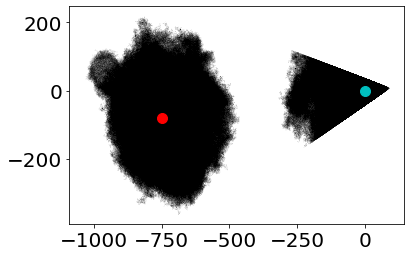

In [310]:
plt.plot(DM_coords_mainhalo[DM_big_cut][:,0], DM_coords_mainhalo[DM_big_cut][:,1], 'ko', ms=0.01)

plt.plot(ctr_mw_galframe[0], ctr_mw_galframe[1], marker='o', ms=10, c='c')

plt.plot(ctr_m31_galframe[0], ctr_m31_galframe[1], marker='o', ms=10, c='r')
plt.show()

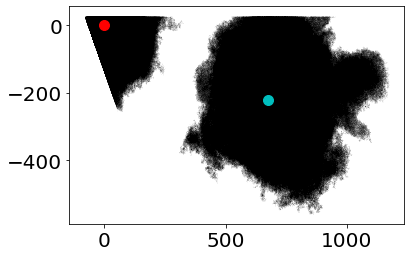

In [309]:
plt.plot(DM_coords_mainhalo_flipped[DM_big_cut_flipped][:,0], DM_coords_mainhalo_flipped[DM_big_cut_flipped][:,1], 'ko', ms=0.01)

plt.plot(ctr_mw_galframe_flipped[0], ctr_mw_galframe_flipped[1], marker='o', ms=10, c='c')

plt.plot(ctr_m31_galframe_flipped[0], ctr_m31_galframe_flipped[1], marker='o', ms=10, c='r')
plt.show()

In [289]:
ctr_mw_galframe_flipped
ctr_mw_galframe_flipped[0]

674.4236

In [314]:

mainhalo_density_func(datapathh, halo_to_analyze, DM_coords_mainhalo, dm_mass)

Computing Voronoi tessellation...
Errors: 0
17469.97003698349


In [7]:
mainhalo_voronoi = np.load(datapathh + halo_to_analyze + '_voronoi_mainhalo.npy', allow_pickle = True)

mainhalo_voronoi_flipped = np.load(datapathh + halo_to_analyze + '_voronoi_mainhalo.npy', allow_pickle = True)




In [260]:
print(len(mainhalo_voronoi))
print(len(mainhalo_voronoi_flipped))

26047237
47062405


In [8]:
#mainnn = np.logical_or((np.logical_or((subflags_mw_m31 == sub_mw), (subflags_mw_m31 == sub_m31))), (subflags_mw_m31 == 0))

mainnn = np.logical_and((np.logical_or((subflags_mw_m31 == sub_mw), (subflags_mw_m31 == sub_m31))), (np.logical_or((groupflags_mw_m31 == fof_mw), (groupflags_mw_m31 == fof_m31))))

DM_coords_mainhalo = DM_coords_galframe[mainnn]
DM_vels_mainhalo = DM_vels_galframe[mainnn]

DMcoords_mainhalo_pyr_dist_to_mw = np.sum(np.abs(DM_coords_mainhalo - ctr_mw_galframe)**2,axis=-1)**(1./2)
DMcoords_mainhalo_pyr_dist_to_m31 = np.sum(np.abs(DM_coords_mainhalo - ctr_m31_galframe)**2,axis=-1)**(1./2)    



mainnn_flipped = np.logical_and((np.logical_or((subflags_mw_m31_flipped == sub_mw_flipped), (subflags_mw_m31_flipped == sub_m31_flipped))), (np.logical_or((groupflags_mw_m31_flipped == fof_mw_flipped), (groupflags_mw_m31_flipped == fof_m31_flipped))))

DM_coords_mainhalo_flipped = DM_coords_galframe_flipped[mainnn_flipped]
DM_vels_mainhalo_flipped = DM_vels_galframe_flipped[mainnn_flipped]

DMcoords_mainhalo_pyr_dist_to_mw_flipped = np.sum(np.abs(DM_coords_mainhalo_flipped - ctr_mw_galframe_flipped)**2,axis=-1)**(1./2)
DMcoords_mainhalo_pyr_dist_to_m31_flipped = np.sum(np.abs(DM_coords_mainhalo_flipped - ctr_m31_galframe_flipped)**2,axis=-1)**(1./2)    




In [261]:
print(len(DM_coords_mainhalo))
print(len(DM_coords_mainhalo_flipped))

44555526
44555526


In [9]:


local_densities = float(dm_mass)/np.array(mainhalo_voronoi)
mainhalo_I_s = local_densities**2




local_densities_flipped = float(dm_mass)/np.array(mainhalo_voronoi_flipped)
mainhalo_I_s_flipped = local_densities_flipped**2

In [ ]:
print()

In [317]:


print(len(DM_coords_mainhalo_flipped))
print(len(local_densities_flipped))

print(len(DM_coords_mainhalo))
print(len(local_densities))

44555526
44555526
44555526
44555526


In [10]:
vv = [ctr_mw_galframe[0]- ctr_m31_galframe[0], ctr_mw_galframe[1]- ctr_m31_galframe[1], ctr_mw_galframe[2]- ctr_m31_galframe[2]]

vv = vv/np.linalg.norm(vv)
pyr_point = [100*vv[0], 100*vv[1], 100*vv[2]]



opening_angle = 1



subhalo_big_cut = pyramidFlagger(subhalo_coords_galframe[:,0], subhalo_coords_galframe[:,1], subhalo_coords_galframe[:,2], pyr_point, ctr_m31_galframe, opening_angle, opening_angle)
DM_big_cut = pyramidFlagger(DM_coords_mainhalo[:,0], DM_coords_mainhalo[:,1], DM_coords_mainhalo[:,2], pyr_point, ctr_m31_galframe, opening_angle, opening_angle)



In [319]:
print(len(DM_big_cut))

44555526


In [11]:

m31_smooth_cut = DMcoords_mainhalo_pyr_dist_to_m31[DM_big_cut] <= 200
mw_smooth_cut = DMcoords_mainhalo_pyr_dist_to_mw[DM_big_cut] <= 200

DM_coords_mainhalo_m31 = DM_coords_mainhalo[DM_big_cut][m31_smooth_cut]
mainhalo_I_s_m31 = mainhalo_I_s[DM_big_cut][m31_smooth_cut]

DM_coords_mainhalo_mw = DM_coords_mainhalo[DM_big_cut][mw_smooth_cut]
mainhalo_I_s_mw = mainhalo_I_s[DM_big_cut][mw_smooth_cut]




m31_smooth_cut_flipped = DMcoords_mainhalo_pyr_dist_to_m31_flipped[DM_big_cut_flipped] <= 200
mw_smooth_cut_flipped = DMcoords_mainhalo_pyr_dist_to_mw_flipped[DM_big_cut_flipped] <= 200

DM_coords_mainhalo_m31_flipped = DM_coords_mainhalo_flipped[DM_big_cut_flipped][m31_smooth_cut_flipped]
mainhalo_I_s_m31_flipped = mainhalo_I_s_flipped[DM_big_cut_flipped][m31_smooth_cut_flipped]

DM_coords_mainhalo_mw_flipped = DM_coords_mainhalo_flipped[DM_big_cut_flipped][mw_smooth_cut_flipped]
mainhalo_I_s_mw_flipped = mainhalo_I_s_flipped[DM_big_cut_flipped][mw_smooth_cut_flipped]



In [321]:
len(m31_smooth_cut)

36659080

In [323]:
len(DM_coords_mainhalo[DM_big_cut])

36659080

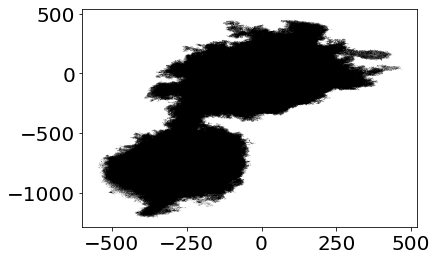

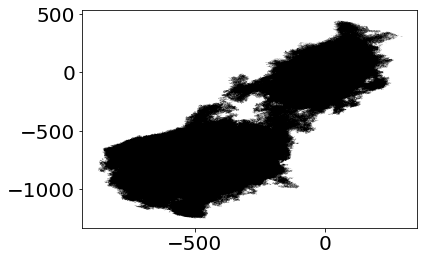

In [244]:
plt.plot(DM_coords_mainhalo[:,0], DM_coords_mainhalo[:,1], 'ko', ms=0.01)
plt.show()
plt.plot(DM_coords_mainhalo_flipped[:,0], DM_coords_mainhalo_flipped[:,1], 'ko', ms=0.01)
plt.show()

In [228]:
len(DM_coords_mainhalo)

52628893

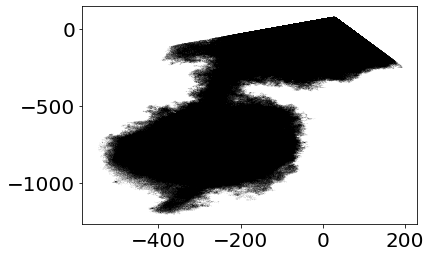

In [216]:
plt.plot(DM_coords_mainhalo[:,0][DM_big_cut], DM_coords_mainhalo[:,1][DM_big_cut], 'ko', ms=0.01)
plt.show()

In [12]:
from astropy.coordinates import cartesian_to_spherical
from astropy.coordinates import spherical_to_cartesian


### Find the correct solar position

def sample_spherical(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec

ll_list, bb_list = [], []

xi, yi, zi = sample_spherical(100)


phi = np.linspace(0, np.pi, 300)
theta = np.linspace(0, 2 * np.pi, 300)
r = 8


for phi_val in phi:
    for theta_val in theta:
        
        x_sun = r * np.cos(theta_val) * np.sin(phi_val)
        y_sun = r * np.sin(theta_val) * np.sin(phi_val)
        z_sun = r * np.cos(phi_val)

        solar_position_xyz = [x_sun, y_sun, z_sun]

        
        
        spherical_origin = np.array(solar_position_xyz)
        
        
        
        mw_center = np.array([0, 0, 0]) - spherical_origin
        m31_center = np.array(ctr_m31_galframe) - spherical_origin
        
        #pyramid_midline = np.array([ctr_mw_galframe_flipped[0], ctr_mw_galframe_flipped[1], ctr_mw_galframe_flipped[2]]) - np.array(solar_position_xyz)

        r_mw, lat_mw, lon_mw = cartesian_to_spherical(mw_center[0], mw_center[1], mw_center[2])
        r_mw = r_mw.value
        lat_mw = lat_mw.value 
        lon_mw = lon_mw.value
        
        r_m31, lat_m31, lon_m31 = cartesian_to_spherical(m31_center[0], m31_center[1], m31_center[2])
        r_m31 = r_m31.value
        lat_m31 = lat_m31.value 
        lon_m31 = lon_m31.value
        
        l = lon_m31 - lon_mw
        b = lat_m31 - lat_mw
        
        l_target = 121
        b_target = -22
        
        ll_list.append(l)
        
        bb_list.append(b)
        
        if np.logical_and((np.round(abs(np.degrees(b) - b_target),1) < 1), (np.round(abs(abs(np.degrees(l)) - l_target),1) < 1)):
        
            #print(r_m31)
            #print(np.round(np.degrees(l), 1))
            #print(np.round(np.degrees(b),1))
            #print([x_sun, y_sun, z_sun])
            #print('')
            solar_position= [x_sun, y_sun, z_sun]
            
            
            
            
            
        
        mw_center_flipped = np.array([0, 0, 0]) - spherical_origin
        m31_center_flipped = np.array(ctr_mw_galframe_flipped) - spherical_origin
        
        #pyramid_midline = np.array([ctr_mw_galframe_flipped[0], ctr_mw_galframe_flipped[1], ctr_mw_galframe_flipped[2]]) - np.array(solar_position_xyz)

        r_mw_flipped, lat_mw_flipped, lon_mw_flipped = cartesian_to_spherical(m31_center_flipped[0], m31_center_flipped[1], m31_center_flipped[2])
        r_mw_flipped = r_mw_flipped.value
        lat_mw_flipped = lat_mw_flipped.value 
        lon_mw_flipped = lon_mw_flipped.value
        
        r_m31_flipped, lat_m31_flipped, lon_m31_flipped = cartesian_to_spherical(mw_center_flipped[0], mw_center_flipped[1], mw_center_flipped[2])
        r_m31_flipped = r_m31_flipped.value
        lat_m31_flipped = lat_m31_flipped.value 
        lon_m31_flipped = lon_m31_flipped.value
        
        l_flipped = lon_m31_flipped - lon_mw_flipped
        b_flipped = lat_m31_flipped - lat_mw_flipped
        
        l_target = 121
        b_target = -22
        
        
        if np.logical_and((np.round(abs(np.degrees(b_flipped) - b_target),1) < 1), (np.round(abs(abs(np.degrees(l_flipped)) - l_target),1) < 1)):
        
            #print(r_m31)
            print(np.round(np.degrees(l_flipped), 1))
            print(np.round(np.degrees(b_flipped),1))
            print([x_sun, y_sun, z_sun])
            print('')
            solar_position_flipped= [x_sun, y_sun, z_sun]
            
        

distt = np.linalg.norm(solar_position - ctr_m31_galframe)

-121.5
-22.6
[6.099316093541294, 5.069586375743372, -1.0476818075853775]

-120.3
-22.6
[5.991445014437325, 5.196628663761609, -1.0476818075853775]

-121.5
-22.0
[6.090514018128842, 5.062270329008807, -1.1309545132378784]

-120.3
-22.0
[5.982798610473694, 5.189129279127752, -1.1309545132378784]

-121.5
-21.4
[6.081039574275834, 5.054395427833277, -1.2141023660257209]

-120.3
-21.4
[5.973491729420623, 5.181057035331127, -1.2141023660257209]



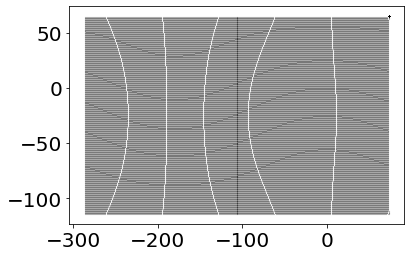

In [166]:
plt.plot(np.degrees(ll_list), np.degrees(bb_list), 'ko', ms=0.1)

In [13]:
plt.plot(DMcoords_mainhalo_pyr_dist_to_m31[DM_big_cut][m31_smooth_cut], local_densities[m31_smooth_cut],  'ko', ms=0.01)
plt.yscale('log')
#plt.xscale('log')
plt.show()

In [19]:

mainhalo_density_func(datapathh, halo_to_analyze, DM_coords_mainhalo[DM_big_cut], dm_mass)

Computing Voronoi tessellation...
Errors: 0
9966.180540561676


In [219]:

mainhalo_voronoi = np.load(datapathh + halo_to_analyze + '_voronoi_mainhalo.npy', allow_pickle = True)


local_densities = float(dm_mass)/np.array(mainhalo_voronoi)

In [185]:


local_densities = float(dm_mass)/np.array(mainhalo_voronoi)
mainhalo_I_s = local_densities**2

In [220]:
len(local_densities)

56146095

In [27]:


den = []
rarray = np.arange(0, 200, 0.5)
deltar = rarray[1]-rarray[0]
for rr in range(1, len(rarray)):
    
    r_end = rarray[rr]
    r_start = rarray[rr-1]
    print(r_end, end = ' ')
    shell_dens = local_densities[np.logical_and((DMcoords_mainhalo_pyr_dist_to_m31[DM_big_cut] >= r_start), (DMcoords_mainhalo_pyr_dist_to_m31[DM_big_cut] < r_end))]
    #den.append(np.nanmean(shell_dens) / (4/3 * np.pi * (r_start+deltar/2)**3))
    den.append(np.nanmean(shell_dens) )
    

0.5 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 5.5 6.0 6.5 7.0 7.5 8.0 8.5 9.0 9.5 10.0 10.5 11.0 11.5 12.0 12.5 13.0 13.5 14.0 14.5 15.0 15.5 16.0 16.5 17.0 17.5 18.0 18.5 19.0 19.5 20.0 20.5 21.0 21.5 22.0 22.5 23.0 23.5 24.0 24.5 25.0 25.5 26.0 26.5 27.0 27.5 28.0 28.5 29.0 29.5 30.0 30.5 31.0 31.5 32.0 32.5 33.0 33.5 34.0 34.5 35.0 35.5 36.0 36.5 37.0 37.5 38.0 38.5 39.0 39.5 40.0 40.5 41.0 41.5 42.0 42.5 43.0 43.5 44.0 44.5 45.0 45.5 46.0 46.5 47.0 47.5 48.0 48.5 49.0 49.5 50.0 50.5 51.0 51.5 52.0 52.5 53.0 53.5 54.0 54.5 55.0 55.5 56.0 56.5 57.0 57.5 58.0 58.5 59.0 59.5 60.0 60.5 61.0 61.5 62.0 62.5 63.0 63.5 64.0 64.5 65.0 65.5 66.0 66.5 67.0 67.5 68.0 68.5 69.0 69.5 70.0 70.5 71.0 71.5 72.0 72.5 73.0 73.5 74.0 74.5 75.0 75.5 76.0 76.5 77.0 77.5 78.0 78.5 79.0 79.5 80.0 80.5 81.0 81.5 82.0 82.5 83.0 83.5 84.0 84.5 85.0 85.5 86.0 86.5 87.0 87.5 88.0 88.5 89.0 89.5 90.0 90.5 91.0 91.5 92.0 92.5 93.0 93.5 94.0 94.5 95.0 95.5 96.0 96.5 97.0 97.5 98.0 98.5 99.0 99.5 100.0 100.5 101.0 101.5 

In [203]:
len(DM_big_cut)

52628893

In [205]:
len(m31_smooth_cut)

28724866

In [206]:
len(mainhalo_I_s)
len(DMcoords_mainhalo_pyr_dist_to_m31)

56146095

In [207]:
len(DMcoords_mainhalo_pyr_dist_to_m31)

52628893

In [201]:
m31_smooth_cut = DMcoords_mainhalo_pyr_dist_to_m31[DM_big_cut] <= 200
mw_smooth_cut = DMcoords_mainhalo_pyr_dist_to_mw[DM_big_cut] <= 200


DM_coords_mainhalo_m31 = DM_coords_mainhalo[DM_big_cut][m31_smooth_cut]
mainhalo_I_s_m31 = mainhalo_I_s[m31_smooth_cut]

DM_coords_mainhalo_mw = DM_coords_mainhalo[DM_big_cut][mw_smooth_cut]
mainhalo_I_s_mw = mainhalo_I_s[mw_smooth_cut]

In [333]:
DM_coords_mainhalo_m31 = DM_coords_mainhalo[DM_big_cut][m31_smooth_cut]
mainhalo_I_s_m31 = mainhalo_I_s[m31_smooth_cut]

DM_coords_mainhalo_mw = DM_coords_mainhalo[DM_big_cut][mw_smooth_cut]
mainhalo_I_s_mw = mainhalo_I_s[mw_smooth_cut]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 44555526 but corresponding boolean dimension is 36659080

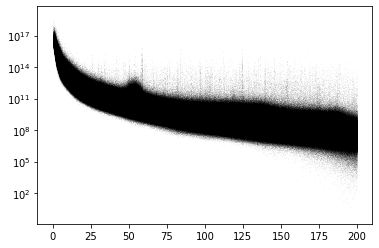

In [45]:
plt.plot(DMcoords_mainhalo_pyr_dist_to_m31[DM_big_cut][m31_smooth_cut], mainhalo_I_s_m31,  'ko', ms=0.01)
plt.yscale('log')

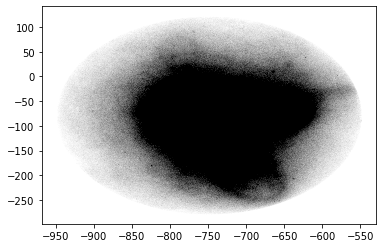

In [184]:
plt.plot(DM_coords_mainhalo_m31[:,0], DM_coords_mainhalo_m31[:,1], 'k.', ms=0.0045)
plt.show()

In [178]:
len(DM_coords_mainhalo)

44555526

In [179]:
len(mainhalo_coords_galframe_pyr_)

44555526

In [13]:
mainhalo_coords_galframe_pyr_ = DM_coords_mainhalo[DM_big_cut] - np.array(solar_position)
pyramid_midline = np.array([ctr_m31_galframe[0], ctr_m31_galframe[1], ctr_m31_galframe[2]]) - np.array(solar_position)
    
    
r_m31, lat_m31, lon_m31 = cartesian_to_spherical(pyramid_midline[0], pyramid_midline[1], pyramid_midline[2])
r_m31 = r_m31.value
lat_m31 = lat_m31.value 
lon_m31 = lon_m31.value


mainhalo_r, mainhalo_lat, mainhalo_lon = cartesian_to_spherical(mainhalo_coords_galframe_pyr_[:,0], mainhalo_coords_galframe_pyr_[:,1], mainhalo_coords_galframe_pyr_[:,2])
r = mainhalo_r.value
lat = mainhalo_lat.value
lon = mainhalo_lon.value
### Putting M31 in the middle of line of sight
mainhalo_r = r
#mainhalo_lat = lat 
#mainhalo_lon = lon 
mainhalo_lat = lat - lat_m31
mainhalo_lat = mainhalo_lat
mainhalo_lon = lon - lon_m31
mainhalo_lon = mainhalo_lon







mainhalo_coords_galframe_pyr_flipped_ = DM_coords_mainhalo_flipped[DM_big_cut_flipped] - np.array(solar_position_flipped)
pyramid_midline_flipped = np.array([ctr_mw_galframe_flipped[0], ctr_mw_galframe_flipped[1], ctr_mw_galframe_flipped[2]]) - np.array(solar_position_flipped)
    
    
r_m31_flipped, lat_m31_flipped, lon_m31_flipped = cartesian_to_spherical(pyramid_midline_flipped[0], pyramid_midline_flipped[1], pyramid_midline_flipped[2])
r_m31_flipped = r_m31_flipped.value
lat_m31_flipped = lat_m31_flipped.value 
lon_m31_flipped = lon_m31_flipped.value


mainhalo_r_flipped, mainhalo_lat_flipped, mainhalo_lon_flipped = cartesian_to_spherical(mainhalo_coords_galframe_pyr_flipped_[:,0], mainhalo_coords_galframe_pyr_flipped_[:,1], mainhalo_coords_galframe_pyr_flipped_[:,2])
r_flipped = mainhalo_r_flipped.value
lat_flipped = mainhalo_lat_flipped.value
lon_flipped = mainhalo_lon_flipped.value
### Putting M31 in the middle of line of sight
mainhalo_r_flipped = r_flipped
#mainhalo_lat = lat 
#mainhalo_lon = lon 
mainhalo_lat_flipped = lat_flipped - lat_m31_flipped
mainhalo_lat_flipped = mainhalo_lat_flipped
mainhalo_lon_flipped = lon_flipped - lon_m31_flipped
mainhalo_lon_flipped = mainhalo_lon_flipped



In [330]:
len(mainhalo_voronoi[DM_big_cut][m31_smooth_cut])

14346231

In [328]:
len(mainhalo_I_s_m31)

14346231

In [14]:
mainhalo_s_flux_m31 = np.array(mainhalo_I_s_m31)*np.array(mainhalo_voronoi[DM_big_cut][m31_smooth_cut])/np.array(mainhalo_r[m31_smooth_cut])**2
mainhalo_s_flux_mw= np.array(mainhalo_I_s_mw)*np.array(mainhalo_voronoi[DM_big_cut][mw_smooth_cut])/np.array(mainhalo_r[mw_smooth_cut])**2

#mainhalo_s_flux_m31 = np.array(mainhalo_I_s_m31)*np.array(mainhalo_voronoi[DM_big_cut][m31_smooth_cut])/np.array(mainhalo_r[m31_smooth_cut])**2
#mainhalo_s_flux_mw= np.array(mainhalo_I_s_mw)*np.array(mainhalo_voronoi[DM_big_cut][mw_smooth_cut])/np.array(mainhalo_r[mw_smooth_cut])**2


mainhalo_s_flux_m31_flipped = np.array(mainhalo_I_s_m31_flipped)*np.array(mainhalo_voronoi_flipped[DM_big_cut_flipped][m31_smooth_cut_flipped])/np.array(mainhalo_r_flipped[m31_smooth_cut_flipped])**2
mainhalo_s_flux_mw_flipped= np.array(mainhalo_I_s_mw_flipped)*np.array(mainhalo_voronoi_flipped[DM_big_cut_flipped][mw_smooth_cut_flipped])/np.array(mainhalo_r_flipped[mw_smooth_cut_flipped])**2

#mainhalo_s_flux_m31_flipped = np.array(mainhalo_I_s_m31_flipped)*np.array(mainhalo_voronoi_flipped[DM_big_cut_flipped][m31_smooth_cut_flipped])/np.array(mainhalo_r_flipped[m31_smooth_cut_flipped])**2
#mainhalo_s_flux_mw_flipped= np.array(mainhalo_I_s_mw_flipped)*np.array(mainhalo_voronoi_flipped[DM_big_cut_flipped][mw_smooth_cut_flipped])/np.array(mainhalo_r_flipped[mw_smooth_cut_flipped])**2



In [43]:
pixel_size_in_deg = 0.5

resolution = np.radians(pixel_size_in_deg)

In [71]:
0.05*np.pi/180

0.0008726646259971648

In [72]:
1e17/(0.0009)**2

1.234567901234568e+23

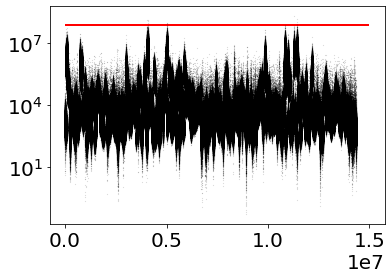

In [592]:
plt.plot(mainhalo_s_flux_m31, 'ko', ms=0.05)

plt.hlines(np.nanmean(mainhalo_s_flux_m31)+100*np.nanstd(mainhalo_s_flux_m31), 0, 1.5e7, color='r', lw=2)
#plt.ylim(1e7, 1e9)
plt.yscale('log')
plt.show()

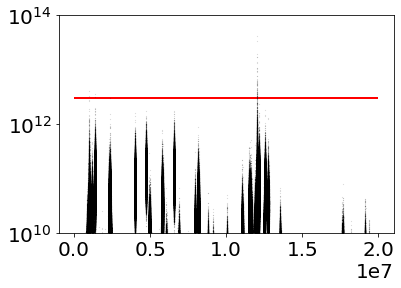

In [469]:
plt.plot(mainhalo_s_flux_mw, 'ko', ms=0.05)

plt.hlines(np.nanmean(mainhalo_s_flux_mw)+120*np.nanstd(mainhalo_s_flux_mw), 0, 2e7, color='r', lw=2)
plt.ylim(1e10, 1e14)
plt.yscale('log')
plt.show()

In [47]:

pixel_size = np.radians(pixel_size_in_deg)


theta_bin_width =pixel_size
phi_bin_width = pixel_size


theta_range_min = -np.radians(13) - np.radians(3)
phi_range_min = -np.radians(13) - np.radians(3)
theta_range_max = np.radians(13) + np.radians(3)
phi_range_max = np.radians(13) + np.radians(3)


theta_bin_edges = np.arange(theta_range_min, theta_range_max+theta_bin_width, theta_bin_width)
phi_bin_edges = np.arange(phi_range_min, phi_range_max+phi_bin_width, phi_bin_width)


num_of_pixels = len(theta_bin_edges)*len(phi_bin_edges)

print('there are ' , num_of_pixels , ' pixels')
    
    
    
selectionn_all_mw, selectionn_all_m31 = [], []
    
mainhalo_s_jfactor_smallpyr_total = []
bin_middle_all = []
mainhalo_s_flux_smooth_m31 = []

mainhalo_s_flux_smooth_mw = []

n = 0
time_list = []

num_of_particles_cut_m31 = []
stdev_all = []
    

mw_flux_cut = np.nanmean(mainhalo_s_flux_mw)+10*np.nanstd(mainhalo_s_flux_mw)
m31_flux_cut = np.nanmean(mainhalo_s_flux_m31)+10*np.nanstd(mainhalo_s_flux_m31)

mw_flux_mean = []
  
    
for theta_i in range(len(theta_bin_edges)-1):
    for phi_i in range(len(phi_bin_edges)-1):

        start_time = time.time()


        if (n%1000 == 0 and n > 10) or n == 50:
            print('')
            print('Estimated time remaining: ' , round(((num_of_pixels-n)*np.mean(time_list)) / 60, 1) , ' minutes.')
        n = n + 1

        bin_middle = [theta_bin_edges[theta_i] + theta_bin_width/2, phi_bin_edges[phi_i] + phi_bin_width/2]



        bin_middle_all.append(bin_middle)


        mainhalo_small_pyramid = np.logical_and(np.logical_and(mainhalo_lat >= theta_bin_edges[theta_i], mainhalo_lat < theta_bin_edges[theta_i + 1]), np.logical_and(mainhalo_lon >= phi_bin_edges[phi_i], mainhalo_lon < phi_bin_edges[phi_i + 1]))

        #print(len(mainhalo_small_pyramid))
            
            
        l_bins = np.arange(400, 1100, 1)
            
            
        dl = l_bins[1] - l_bins[0] 
                

        mainhalo_s_jfactor_smallpyr = []
                
                
            
            
            
        selectionn = np.array(mainhalo_s_flux_m31)[np.array(mainhalo_small_pyramid)[m31_smooth_cut]]
            
            
        anomalous_cut = selectionn < np.nanmean(selectionn) + np.nanstd(selectionn)*1
        #anomalous_cut = selectionn < np.mean(selectionn[anomalous_cut]) + 1*np.nanstd(selectionn[anomalous_cut])
        #anomalous_cut = selectionn > 0
            
            
            
            
            
            
        #mainhalo_s_flux_smooth_m31.append(np.nansum(selectionn[anomalous_cut]))
    
    
        num_of_particles_cut_m31.append(len(anomalous_cut[anomalous_cut == False]))
    
        
        stdev_all.append(np.nanstd(selectionn))
        
        
    
    
    
    
        
        
        
        #selectt = np.partition(selectionn[anomalous_cut].flatten(), -2)[:-4]
        
        #selectt =selectionn[anomalous_cut][selectionn[anomalous_cut] < (np.nanmean(selectionn[anomalous_cut]) + 2*np.nanstd(selectionn[anomalous_cut]))]
        selectt =selectionn[anomalous_cut]
        
        
        
        selectionn_all_m31.append(selectt)
        
        
        mainhalo_s_flux_smooth_m31.append(np.nansum(selectt))
        
        
        
        
        
        
        
        #print(np.nansum(selectionn[anomalous_cut]))
        '''
        if np.nansum(selectionn[anomalous_cut]) > 0:
            if np.nanmean(selectionn[anomalous_cut]) > 2e9:
                plt.plot(selectionn[anomalous_cut], 'ro', ms=1)
            else:
                plt.plot(selectionn[anomalous_cut], 'ko', ms=1)
            #plt.plot(selectionn[anomalous_cut][selectionn[anomalous_cut] > np.mean(selectionn[anomalous_cut]) + 1*np.nanstd(selectionn[anomalous_cut])], 'mo')
            plt.hlines(np.mean(selectionn[anomalous_cut]) + 0.1*np.nanstd(selectionn[anomalous_cut]),0, len(selectionn[anomalous_cut]), color='r', lw=2)
            plt.ylim(1e3, 1e14)
            plt.yscale('log')
            plt.show()
        '''
        
        
        
        
        selectionn = np.array(mainhalo_s_flux_mw)[np.array(mainhalo_small_pyramid)[mw_smooth_cut]]
        
        
        
        
        anomalous_cut = selectionn < np.nanmean(selectionn) + np.nanstd(selectionn)*1
        #anomalous_cut = selectionn < np.mean(selectionn[anomalous_cut]) + 1*np.nanstd(selectionn[anomalous_cut])
        #anomalous_cut = selectionn > 0
        
        
        #selectt =selectionn[anomalous_cut][selectionn[anomalous_cut] < (np.nanmean(selectionn[anomalous_cut]) + 2*np.nanstd(selectionn[anomalous_cut]))]
        selectt =selectionn[anomalous_cut]
        
        
        mainhalo_s_flux_smooth_mw.append(np.nansum(selectt))
        
        
        
        mw_flux_mean.append(np.nanmean(selectionn[anomalous_cut]))
        
       
        
        selectionn_all_mw.append(selectionn)
        
        
        
        
        #mainhalo_s_flux_smooth_mw.append(np.nansum(np.array(mainhalo_s_flux_mw)[np.array(mainhalo_small_pyramid)[mw_smooth_cut]]))
        
        
        #mainhalo_s_flux_mw.append(np.nansum(np.array(mainhalo_s_flux_mw)[mainhalo_small_pyramid][mw_smooth_cut]))
        
        #mainhalo_s_jfactor_smallpyr_total.append(np.nansum(mainhalo_s_jfactor_smallpyr))

        #mainhalo_s_jfactor_smallpyr_total.append(np.nansum(np.array(mainhalo_s_jfactor_smallpyr)[np.array(mainhalo_s_jfactor_smallpyr) < 1e9]))




        time_list.append(time.time()-start_time)

        if n % 1000 == 0:
            print('.' , end = '')



#print('bin middle length, ' , len(bin_middle_all))
  
### Chopping off the edges where there are pixels with underestimated flux values

    
    
chop_amount = np.radians(2)

bin_middle_all = np.array(bin_middle_all)

    
edge_cut = np.logical_and((np.logical_and((bin_middle_all[:,0] >= -opening_angle+chop_amount), (bin_middle_all[:,0] < opening_angle-chop_amount))),np.logical_and((bin_middle_all[:,1] >= -opening_angle+chop_amount), (bin_middle_all[:,1] < opening_angle-chop_amount)))

    

bin_middle_all_edgecut = bin_middle_all[edge_cut]


    
#mainhalo_s_jfactor_smallpyr_total_edgecut = np.array(mainhalo_s_jfactor_smallpyr_total)[edge_cut]


mainhalo_s_flux_smooth_edgecut_m31 = np.array(mainhalo_s_flux_smooth_m31)[edge_cut]



mainhalo_s_flux_smooth_edgecut_mw = np.array(mainhalo_s_flux_smooth_mw)[edge_cut]





c = np.array(mainhalo_s_flux_smooth_mw)[edge_cut]
    

#### Converting jfactor map bins to degrees

bin_middle_all_edgecut_deg = bin_middle_all_edgecut*(180/np.pi)


    

there are  4225  pixels


/cosma/local/Python/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:84: RuntimeWarning: Mean of empty slice
/cosma/local/Python/3.6.5/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)



Estimated time remaining:  34.8  minutes.
.
Estimated time remaining:  26.9  minutes.
.
Estimated time remaining:  18.6  minutes.
.
Estimated time remaining:  10.3  minutes.
.
Estimated time remaining:  1.9  minutes.


In [45]:
sel_len_mw = [len(selectionn_all_mw[r]) for r in range(len(selectionn_all_mw))]



In [61]:
sum(num_of_particles_cut_m31)/len(mainhalo_s_flux_m31)

0.06852900946597054

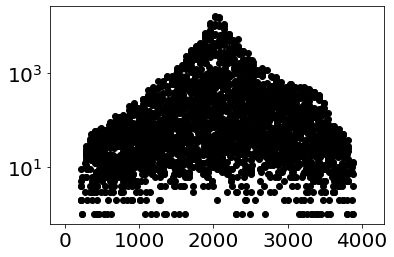

In [59]:
plt.plot(num_of_particles_cut_m31, 'ko')
plt.yscale('log')
plt.show()

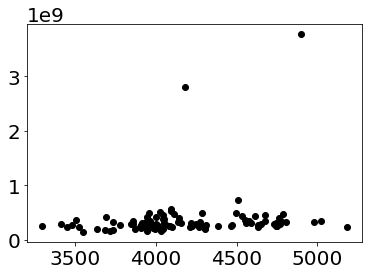

In [582]:
plt.plot(np.array(sel_len_mw), np.array(mw_flux_mean), 'ko')
#plt.hlines(np.nanmean(mw_flux_mean)+5*np.nanstd(mw_flux_mean), 0, max(sel_len_mw))
plt.show()

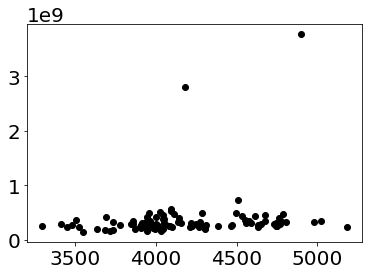

In [571]:
plt.plot(np.array(sel_len_mw), np.array(mw_flux_mean), 'ko')
#plt.hlines(np.nanmean(mw_flux_mean)+5*np.nanstd(mw_flux_mean), 0, max(sel_len_mw))
plt.show()

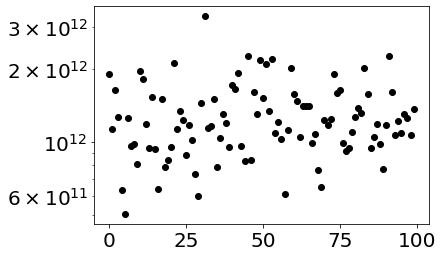

In [567]:

plt.plot(mainhalo_s_flux_smooth_edgecut_mw, 'ko')
plt.yscale('log')
plt.show()

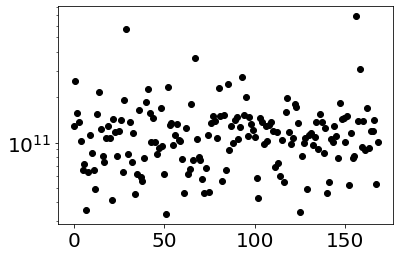

In [536]:

plt.plot(mainhalo_s_flux_smooth_edgecut_mw, 'ko')
plt.yscale('log')
plt.show()

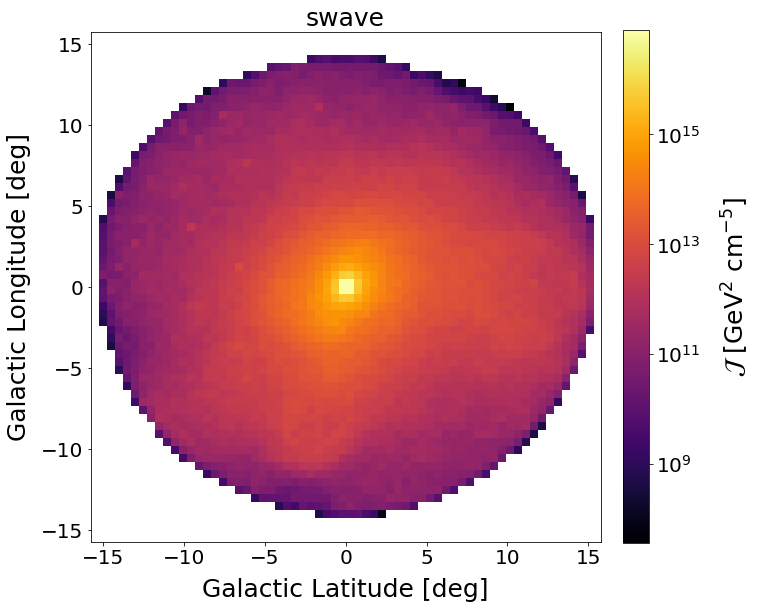

In [57]:
conversion  = (4e56)**2 * (3.1e21)**(-5)
cmapp = 'plasma'
ff = 15
msss = 300
lpad = 10
lwww = 2
cm1 = cmapp
a = 0


wavee = ['som', 'swave', 'pwave', 'dwave']

res_label='0p5'



fig,axes = plt.subplots(1,1, figsize=(10,10), gridspec_kw={'width_ratios': [2],'height_ratios': [2],'wspace': 0.5,'hspace': 0.05})


#yy_smooth_m31 = mainhalo_s_jfactor_smallpyr_total_edgecut*conversion/np.radians(resolution)**2
   
#yy_smooth_m31 = mainhalo_s_flux_smooth_edgecut_m31*conversion/np.radians(resolution)**2
yy_smooth_m31 = mainhalo_s_flux_smooth_edgecut_m31*conversion
yy_smooth_reshaped_m31 = np.array(yy_smooth_m31).reshape(int(np.sqrt(len(bin_middle_all_edgecut_deg))), int(np.sqrt(len(bin_middle_all_edgecut_deg)))).T
yy_smooth_reshaped_m31 = np.rot90(yy_smooth_reshaped_m31, k=1)

#yy_smooth_mw = mainhalo_s_flux_smooth_edgecut_mw*conversion/np.radians(resolution)**2
yy_smooth_mw = mainhalo_s_flux_smooth_edgecut_mw*conversion
yy_smooth_reshaped_mw = np.array(yy_smooth_mw).reshape(int(np.sqrt(len(bin_middle_all_edgecut_deg))), int(np.sqrt(len(bin_middle_all_edgecut_deg)))).T
yy_smooth_reshaped_mw = np.rot90(yy_smooth_reshaped_mw, k=1)






#ratio = yy_smooth_reshaped_m31
#vminn=1e9 
#vmaxx=1e17




ratio = yy_smooth_reshaped_m31
#vminn=1e15
#vmaxx=1e18



        
        
for ss in range(len(ratio)):
    for pp in range(len(ratio[ss])):
        if ratio[ss][pp] <= 0:
            ratio[ss][pp] = np.nan
        
result = gaussian_filter(ratio , sigma=0)
        
        
        
hdu = fits.PrimaryHDU(result)
hdul = fits.HDUList([hdu])
hdul.writeto('V1_05deg_background_smooth_swave_smoother.fits')
        


#vmin=1e10, vmax=1e17


im = axes.imshow(result, cmap = 'inferno', origin = 'lower', norm = LogNorm(), extent = [min(bin_middle_all_edgecut_deg[:,0]), max(bin_middle_all_edgecut_deg[:,0]), min(bin_middle_all_edgecut_deg[:,1]), max(bin_middle_all_edgecut_deg[:,1])])

axes.set_title('swave', fontsize=25)


cbar = plt.colorbar(im, ax=axes, fraction=0.046, pad=0.04)


cbar.ax.get_yaxis().labelpad = 20

cbar.ax.set_ylabel(r'$\mathcal{J}$ [GeV$^2$ cm$^{-5}$]', fontsize = 25)
        
        

cbar.ax.tick_params(labelsize=20)




axes.set_ylabel('Galactic Longitude [deg]', fontsize = 25, labelpad=lpad)
axes.set_xlabel('Galactic Latitude [deg]', fontsize = 25, labelpad=lpad)


axes.set_aspect('equal')



theta = np.linspace(0, 2*np.pi, 100)

r1= np.arctan(5.5/distt)*(180/np.pi)
r2= np.arctan(117/distt)*(180/np.pi)

plt.savefig('map.pdf')


plt.show()

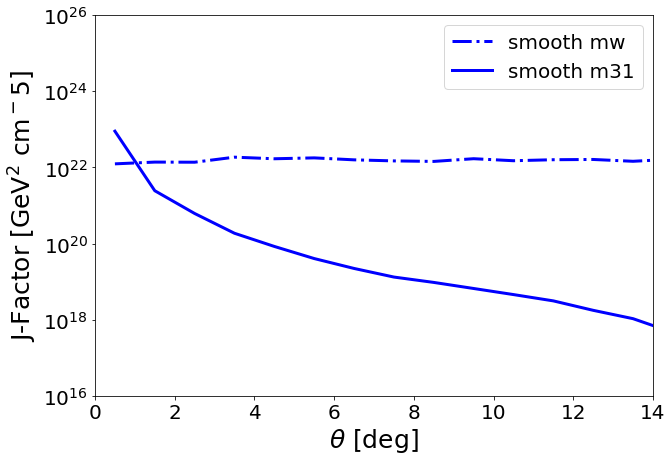

In [38]:
plt.figure(figsize=(10, 7))


for w in range(1):

    latlon_r = np.sqrt(bin_middle_all_edgecut_deg[:,0]**2 + bin_middle_all_edgecut_deg[:,1]**2)
    
    #latlon_r_bins = np.linspace(0, max(latlon_r),25)
    latlon_r_bins = np.arange(0, max(latlon_r),1)
    
    
    yy_smooth_mw_bins_som = []
    yy_sub_mw_bins_som = []
    yy_smooth_m31_bins_som = []
    yy_sub_m31_bins_som = []
    yy_ext_bins_som = []
    
    yy_smooth_mw_bins_s = []
    yy_sub_mw_bins_s = []
    yy_smooth_m31_bins_s = []
    yy_sub_m31_bins_s = []
    yy_ext_bins_s = []
    
    
    yy_smooth_mw_bins_p = []
    yy_sub_mw_bins_p = []
    yy_smooth_m31_bins_p = []
    yy_sub_m31_bins_p = []
    yy_ext_bins_p = []
    
    yy_smooth_mw_bins_d = []
    yy_sub_mw_bins_d = []
    yy_smooth_m31_bins_d = []
    yy_sub_m31_bins_d = []
    yy_ext_bins_d = []
    
    
    
    
    
    

    for ii in range(len(latlon_r_bins)-1):
        start = latlon_r_bins[ii]
        end = latlon_r_bins[ii+1]
        
        #domega = 2*np.pi * (np.cos(np.radians(start)) - np.cos(np.radians(end)))
        
        
        area = np.radians(np.pi * (end**2 - start**2))
        
        
        
        
        
        #yy_ext_bins_som.append(np.nansum(yy_sub_all_ext[0][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_smooth_mw_bins_som.append(np.nansum(yy_smooth_all_mw[0][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_sub_mw_bins_som.append(np.nansum(yy_sub_all_mw[0][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_smooth_m31_bins_som.append(np.nansum(yy_smooth_m31[0][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_sub_m31_bins_som.append(np.nansum(yy_sub_all_m31[0][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        
        
        #yy_ext_bins_s.append(np.nanmean(yy_sub_all_ext[1][np.logical_and((latlon_r >= start), (latlon_r < end))])*area_2/area)
        '''
        yy_smooth_mw_bins_s.append(np.nanmean(yy_smooth_all_mw[1][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        yy_sub_mw_bins_s.append(np.nanmean(yy_sub_all_mw[1][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        yy_smooth_m31_bins_s.append(np.nanmean(yy_smooth_all_m31[1][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        yy_sub_m31_bins_s.append(np.nanmean(yy_sub_all_m31[1][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        '''
        yy_smooth_mw_bins_s.append(np.nanmean(yy_smooth_mw[np.logical_and((latlon_r >= start), (latlon_r < end))]))
        #yy_sub_mw_bins_s.append(np.nanmean(yy_sub_all_mw[1][np.logical_and((latlon_r >= start), (latlon_r < end))]))
        yy_smooth_m31_bins_s.append(np.nanmean(yy_smooth_m31[np.logical_and((latlon_r >= start), (latlon_r < end))]))
        #yy_sub_m31_bins_s.append(np.nanmean(yy_sub_all_m31[1][np.logical_and((latlon_r >= start), (latlon_r < end))]))

        
        

        
        
        #yy_ext_bins_p.append(np.nansum(yy_sub_all_ext[2][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_smooth_mw_bins_p.append(np.nansum(yy_smooth_all_mw[2][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_sub_mw_bins_p.append(np.nansum(yy_sub_all_mw[2][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_smooth_m31_bins_p.append(np.nansum(yy_smooth_all_m31[2][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_sub_m31_bins_p.append(np.nansum(yy_sub_all_m31[2][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)


        #yy_ext_bins_d.append(np.nansum(yy_sub_all_ext[3][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_smooth_mw_bins_d.append(np.nansum(yy_smooth_all_mw[3][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_sub_mw_bins_d.append(np.nansum(yy_sub_all_mw[3][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_smooth_m31_bins_d.append(np.nansum(yy_smooth_all_m31[3][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_sub_m31_bins_d.append(np.nansum(yy_sub_all_m31[3][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)





    width = latlon_r_bins[1] - latlon_r_bins[0]
    latlon_r_bin_middles = [latlon_r_bins[h]+(latlon_r_bins[h+1] - latlon_r_bins[h])/2 for h in range(len(latlon_r_bins)-1)]


    lww = 1
    lwww = 3
    
    
    #plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_mw_bins_som))*conversion, 'r-', lw=lww)
    #plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_m31_bins_som))*conversion, 'r-.', lw=lwww)
    
    
    plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_mw_bins_s))*conversion, 'b-.', lw=lwww, label='smooth mw')
    #plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_mw_bins_s) + np.array(yy_sub_mw_bins_s))*conversion, 'b-.', lw=lww)
    plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_m31_bins_s))*conversion, 'b-', lw=lwww, label='smooth m31')
    #plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_m31_bins_s) + np.array(yy_sub_m31_bins_s))*conversion, 'b-', lw=lww)
    
    #plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_mw_bins_p))*conversion, 'y-', lw=lww)
    #plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_m31_bins_p))*conversion, 'y-.', lw=lwww)
    
    #plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_mw_bins_d))*conversion, 'g-', lw=lww)
    #plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_m31_bins_d))*conversion, 'g-.', lw=lwww)
    
    
    

plt.rcParams['xtick.labelsize']=20

plt.rcParams['ytick.labelsize']=20
    
plt.yscale('log')

plt.xlim(0, 14)
plt.ylim(1e16, 1e26)

#plt.ticklabels(fontsize=20)

plt.legend(fontsize=20)


plt.ylabel(r'J-Factor [GeV$^2$ cm$^-5$]', fontsize=25)
plt.xlabel(r'$\theta$ [deg]', fontsize=25)


plt.savefig('j_plot.pdf')

plt.show()

In [642]:

pixel_size = np.radians(pixel_size_in_deg)


theta_bin_width =pixel_size
phi_bin_width = pixel_size


theta_range_min = -np.radians(13) - np.radians(3)
phi_range_min = -np.radians(13) - np.radians(3)
theta_range_max = np.radians(13) + np.radians(3)
phi_range_max = np.radians(13) + np.radians(3)


theta_bin_edges = np.arange(theta_range_min, theta_range_max+theta_bin_width, theta_bin_width)
phi_bin_edges = np.arange(phi_range_min, phi_range_max+phi_bin_width, phi_bin_width)


num_of_pixels = len(theta_bin_edges)*len(phi_bin_edges)

print('there are ' , num_of_pixels , ' pixels')
    
    
    
selectionn_all_mw, selectionn_all_m31 = [], []
    
mainhalo_s_jfactor_smallpyr_total = []
bin_middle_all = []
mainhalo_s_flux_smooth_m31_flipped = []

mainhalo_s_flux_smooth_mw_flipped = []

n = 0
time_list = []

num_of_particles_cut_m31 = []
stdev_all = []
    
for theta_i in range(len(theta_bin_edges)-1):
    for phi_i in range(len(phi_bin_edges)-1):

        start_time = time.time()


        if (n%1000 == 0 and n > 10) or n == 50:
            print('')
            print('Estimated time remaining: ' , round(((num_of_pixels-n)*np.mean(time_list)) / 60, 1) , ' minutes.')
        n = n + 1

        bin_middle = [theta_bin_edges[theta_i] + theta_bin_width/2, phi_bin_edges[phi_i] + phi_bin_width/2]



        bin_middle_all.append(bin_middle)


        mainhalo_small_pyramid = np.logical_and(np.logical_and(mainhalo_lat_flipped >= theta_bin_edges[theta_i], mainhalo_lat_flipped < theta_bin_edges[theta_i + 1]), np.logical_and(mainhalo_lon_flipped >= phi_bin_edges[phi_i], mainhalo_lon_flipped < phi_bin_edges[phi_i + 1]))

        #print(len(mainhalo_small_pyramid))
            
            
        l_bins = np.arange(400, 1100, 1)
            
            
        dl = l_bins[1] - l_bins[0] 
                

        mainhalo_s_jfactor_smallpyr = []
                
                
        #for l_index in range(len(l_bins)-1):
        
    
        
            #l_main_cut = np.logical_and((mainhalo_r_pyr >= l_bins[l_index]), (mainhalo_r_pyr < l_bins[l_index+1]))
                
            #mainhalo_s_jfactor_smallpyr.append(np.nanmean(mainhalo_I_s_pyr[l_main_cut])*dl)
            
            
            
            #mainhalo_s_jfactor_smallpyr.append(np.nansum(mainhalo_I_s_pyr[l_main_cut])*dl)
            
            #mainhalo_s_jfactor_smallpyr.append(np.nansum(mainhalo_I_s_pyr[l_main_cut])*dl)
            
            
        #print(len(mainhalo_s_flux_m31))
        #print(len(DMcoords_mainhalo_pyr_dist_to_m31[DM_big_cut][m31_smooth_cut]))
        
        
        
          
            
            
            
        selectionn = np.array(mainhalo_s_flux_m31_flipped)[np.array(mainhalo_small_pyramid)[m31_smooth_cut_flipped]]
            
            
        #anomalous_cut = selectionn < np.nanmean(selectionn) + np.nanstd(selectionn)*1
        anomalous_cut = selectionn > 0
        
        
        
        
        #selectt =selectionn[anomalous_cut][selectionn[anomalous_cut] < (np.nanmean(selectionn[anomalous_cut]) + 2*np.nanstd(selectionn[anomalous_cut]))]
        selectt =selectionn[anomalous_cut]
        
        
        
        mw_flux_mean.append(np.nanmean(selectionn[anomalous_cut]))
        
       
        
        selectionn_all_mw.append(selectionn)
        
        
        
            
        mainhalo_s_flux_smooth_m31_flipped.append(np.nansum(selectt))
    
    
        num_of_particles_cut_m31.append(len(anomalous_cut[anomalous_cut == False]))
    
        
        stdev_all.append(np.nanstd(selectionn))
        
        
        selectionn_all_m31.append(selectionn)
    
    
    
    
        '''
        if np.nansum(selectionn) > 0.0:
        
            plt.plot(selectionn, 'ko')
            plt.hlines(np.nanmean(selectionn), 0, 200)
            plt.yscale('log')
            plt.show()
        
        '''
        
        selectionn = np.array(mainhalo_s_flux_mw_flipped)[np.array(mainhalo_small_pyramid)[mw_smooth_cut_flipped]]
        
        
        
        #anomalous_cut = selectionn < np.nanmean(selectionn) + np.nanstd(selectionn)*3
        #anomalous_cut = selectionn < np.mean(selectionn[anomalous_cut]) + 1*np.nanstd(selectionn[anomalous_cut])
        anomalous_cut = selectionn > 0
        
        
        #selectt =selectionn[anomalous_cut][selectionn[anomalous_cut] < (np.nanmean(selectionn[anomalous_cut]) + 2*np.nanstd(selectionn[anomalous_cut]))]
        selectt =selectionn[anomalous_cut]
        
        
        
        
        
        mw_flux_mean.append(np.nanmean(selectionn[anomalous_cut]))
        
       
        
        selectionn_all_mw.append(selectionn)
        
        
        
        
        
        
        mainhalo_s_flux_smooth_mw_flipped.append(np.nansum(selectt))
        
        
        
       
        
        selectionn_all_mw.append(selectionn)
        
        
        
        
        #mainhalo_s_flux_smooth_mw.append(np.nansum(np.array(mainhalo_s_flux_mw)[np.array(mainhalo_small_pyramid)[mw_smooth_cut]]))
        
        
        #mainhalo_s_flux_mw.append(np.nansum(np.array(mainhalo_s_flux_mw)[mainhalo_small_pyramid][mw_smooth_cut]))
        
        #mainhalo_s_jfactor_smallpyr_total.append(np.nansum(mainhalo_s_jfactor_smallpyr))

        #mainhalo_s_jfactor_smallpyr_total.append(np.nansum(np.array(mainhalo_s_jfactor_smallpyr)[np.array(mainhalo_s_jfactor_smallpyr) < 1e9]))




        time_list.append(time.time()-start_time)

        if n % 1000 == 0:
            print('.' , end = '')



#print('bin middle length, ' , len(bin_middle_all))
  
### Chopping off the edges where there are pixels with underestimated flux values

    
    
chop_amount = np.radians(2)

bin_middle_all = np.array(bin_middle_all)

    
edge_cut = np.logical_and((np.logical_and((bin_middle_all[:,0] >= -opening_angle+chop_amount), (bin_middle_all[:,0] < opening_angle-chop_amount))),np.logical_and((bin_middle_all[:,1] >= -opening_angle+chop_amount), (bin_middle_all[:,1] < opening_angle-chop_amount)))

    

bin_middle_all_edgecut = bin_middle_all[edge_cut]


    
#mainhalo_s_jfactor_smallpyr_total_edgecut = np.array(mainhalo_s_jfactor_smallpyr_total)[edge_cut]


mainhalo_s_flux_smooth_edgecut_m31_flipped = np.array(mainhalo_s_flux_smooth_m31_flipped)[edge_cut]

mainhalo_s_flux_smooth_edgecut_mw_flipped = np.array(mainhalo_s_flux_smooth_mw_flipped)[edge_cut]
    

#### Converting jfactor map bins to degrees

bin_middle_all_edgecut_deg_flipped = bin_middle_all_edgecut*(180/np.pi)



there are  1089  pixels


/cosma/local/Python/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:158: RuntimeWarning: Mean of empty slice



Estimated time remaining:  7.4  minutes.
.
Estimated time remaining:  0.6  minutes.


/cosma/local/Python/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


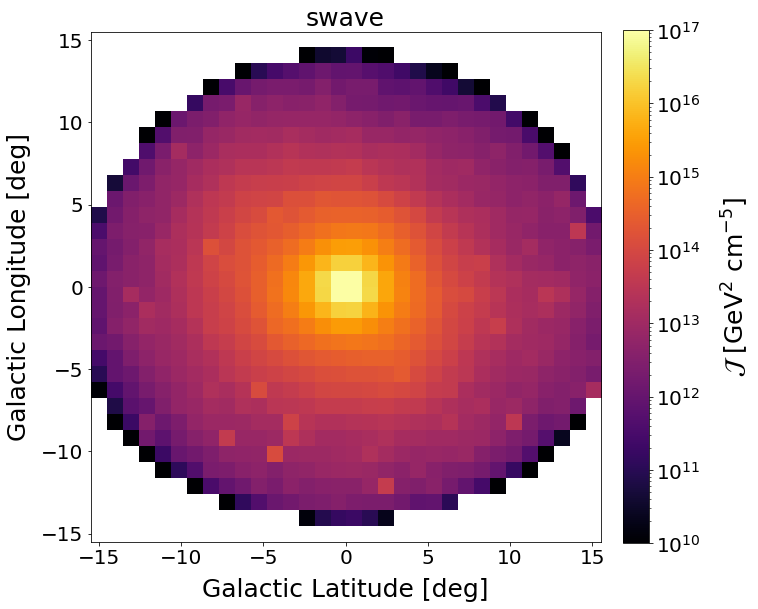

In [643]:
conversion  = (4e56)**2 * (3.1e21)**(-5)
cmapp = 'plasma'
ff = 15
msss = 300
lpad = 10
lwww = 2
cm1 = cmapp
a = 0


wavee = ['som', 'swave', 'pwave', 'dwave']

res_label='0p5'



fig,axes = plt.subplots(1,1, figsize=(10,10), gridspec_kw={'width_ratios': [2],'height_ratios': [2],'wspace': 0.5,'hspace': 0.05})


#yy_smooth_m31 = mainhalo_s_jfactor_smallpyr_total_edgecut*conversion/np.radians(resolution)**2
   
#yy_smooth_m31 = mainhalo_s_flux_smooth_edgecut_m31*conversion/np.radians(resolution)**2
yy_smooth_m31_flipped = mainhalo_s_flux_smooth_edgecut_m31_flipped*conversion
yy_smooth_reshaped_m31_flipped = np.array(yy_smooth_m31_flipped).reshape(int(np.sqrt(len(bin_middle_all_edgecut_deg_flipped))), int(np.sqrt(len(bin_middle_all_edgecut_deg_flipped)))).T
yy_smooth_reshaped_m31_flipped = np.rot90(yy_smooth_reshaped_m31_flipped, k=1)

#yy_smooth_mw = mainhalo_s_flux_smooth_edgecut_mw*conversion/np.radians(resolution)**2
yy_smooth_mw_flipped = mainhalo_s_flux_smooth_edgecut_mw_flipped*conversion
yy_smooth_reshaped_mw_flipped = np.array(yy_smooth_mw_flipped).reshape(int(np.sqrt(len(bin_middle_all_edgecut_deg_flipped))), int(np.sqrt(len(bin_middle_all_edgecut_deg_flipped)))).T
yy_smooth_reshaped_mw_flipped = np.rot90(yy_smooth_reshaped_mw_flipped, k=1)








ratio = yy_smooth_reshaped_mw_flipped
vminn=1e9 
vmaxx=1e17




#ratio = yy_smooth_reshaped_m31_flipped
#vminn=1e15
#vmaxx=1e18




        
        
for ss in range(len(ratio)):
    for pp in range(len(ratio[ss])):
        if ratio[ss][pp] <= 0:
            ratio[ss][pp] = np.nan
        
result = gaussian_filter(ratio , sigma=0)
        
        
        
#hdu = fits.PrimaryHDU(result)
#hdul = fits.HDUList([hdu])
#hdul.writeto('V1_05deg_foreground_smooth_swave.fits')
        





im = axes.imshow(result, cmap = 'inferno', origin = 'lower', norm = LogNorm(), extent = [min(bin_middle_all_edgecut_deg_flipped[:,0]), max(bin_middle_all_edgecut_deg_flipped[:,0]), min(bin_middle_all_edgecut_deg_flipped[:,1]), max(bin_middle_all_edgecut_deg_flipped[:,1])], vmin=1e10, vmax=1e17)

axes.set_title('swave', fontsize=25)


cbar = plt.colorbar(im, ax=axes, fraction=0.046, pad=0.04)


cbar.ax.get_yaxis().labelpad = 20

cbar.ax.set_ylabel(r'$\mathcal{J}$ [GeV$^2$ cm$^{-5}$]', fontsize = 25)
        
        

cbar.ax.tick_params(labelsize=20)




axes.set_ylabel('Galactic Longitude [deg]', fontsize = 25, labelpad=lpad)
axes.set_xlabel('Galactic Latitude [deg]', fontsize = 25, labelpad=lpad)


axes.set_aspect('equal')



theta = np.linspace(0, 2*np.pi, 100)

r1= np.arctan(5.5/distt)*(180/np.pi)
r2= np.arctan(117/distt)*(180/np.pi)

plt.savefig('map.pdf')


plt.show()

In [292]:
len(np.array(selectionn_all_mw)[mainhalo_s_flux_smooth_edgecut_mw > 1e13])

/cosma/local/Python/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


2

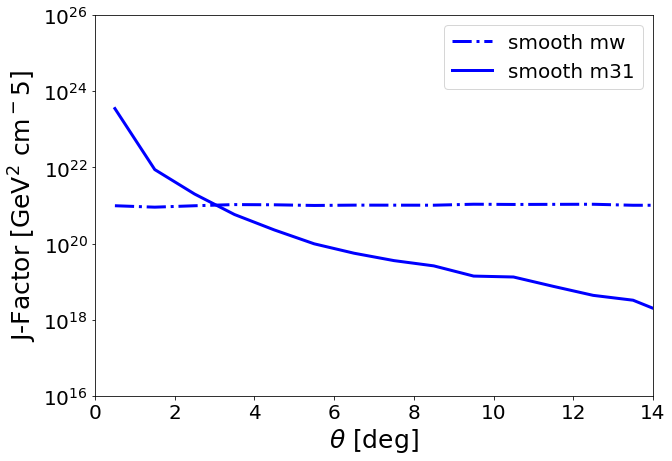

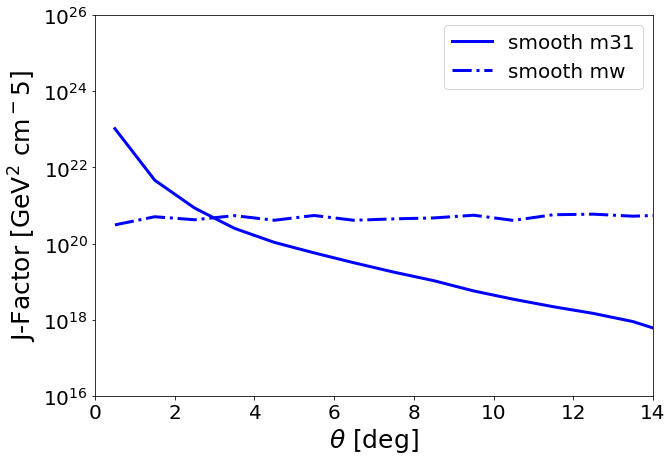

In [376]:
plt.figure(figsize=(10, 7))


for w in range(1):

    latlon_r_flipped = np.sqrt(bin_middle_all_edgecut_deg_flipped[:,0]**2 + bin_middle_all_edgecut_deg_flipped[:,1]**2)
    
    #latlon_r_bins = np.linspace(0, max(latlon_r),25)
    latlon_r_bins_flipped = np.arange(0, max(latlon_r_flipped),1)
    
    
    
    yy_smooth_mw_bins_s_flipped = []
    yy_sub_mw_bins_s_flipped = []
    yy_smooth_m31_bins_s_flipped = []
    yy_sub_m31_bins_s_flipped = []
    yy_ext_bins_s_flipped = []
    
    
    
    
    
    
    
    

    for ii in range(len(latlon_r_bins)-1):
        start = latlon_r_bins_flipped[ii]
        end = latlon_r_bins_flipped[ii+1]
        
        #domega = 2*np.pi * (np.cos(np.radians(start)) - np.cos(np.radians(end)))
        
        
        area = np.radians(np.pi * (end**2 - start**2))
        
        
        
        
        
        #yy_ext_bins_som.append(np.nansum(yy_sub_all_ext[0][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_smooth_mw_bins_som.append(np.nansum(yy_smooth_all_mw[0][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_sub_mw_bins_som.append(np.nansum(yy_sub_all_mw[0][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_smooth_m31_bins_som.append(np.nansum(yy_smooth_m31[0][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_sub_m31_bins_som.append(np.nansum(yy_sub_all_m31[0][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        
        
        #yy_ext_bins_s.append(np.nanmean(yy_sub_all_ext[1][np.logical_and((latlon_r >= start), (latlon_r < end))])*area_2/area)
        '''
        yy_smooth_mw_bins_s.append(np.nanmean(yy_smooth_all_mw[1][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        yy_sub_mw_bins_s.append(np.nanmean(yy_sub_all_mw[1][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        yy_smooth_m31_bins_s.append(np.nanmean(yy_smooth_all_m31[1][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        yy_sub_m31_bins_s.append(np.nanmean(yy_sub_all_m31[1][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        '''
        yy_smooth_mw_bins_s_flipped.append(np.nanmean(yy_smooth_mw_flipped[np.logical_and((latlon_r_flipped >= start), (latlon_r_flipped < end))]))
        #yy_sub_mw_bins_s.append(np.nanmean(yy_sub_all_mw[1][np.logical_and((latlon_r >= start), (latlon_r < end))]))
        yy_smooth_m31_bins_s_flipped.append(np.nanmean(yy_smooth_m31_flipped[np.logical_and((latlon_r_flipped >= start), (latlon_r_flipped < end))]))
        #yy_sub_m31_bins_s.append(np.nanmean(yy_sub_all_m31[1][np.logical_and((latlon_r >= start), (latlon_r < end))]))

        
        

        
        
        #yy_ext_bins_p.append(np.nansum(yy_sub_all_ext[2][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_smooth_mw_bins_p.append(np.nansum(yy_smooth_all_mw[2][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_sub_mw_bins_p.append(np.nansum(yy_sub_all_mw[2][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_smooth_m31_bins_p.append(np.nansum(yy_smooth_all_m31[2][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_sub_m31_bins_p.append(np.nansum(yy_sub_all_m31[2][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)


        #yy_ext_bins_d.append(np.nansum(yy_sub_all_ext[3][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_smooth_mw_bins_d.append(np.nansum(yy_smooth_all_mw[3][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_sub_mw_bins_d.append(np.nansum(yy_sub_all_mw[3][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_smooth_m31_bins_d.append(np.nansum(yy_smooth_all_m31[3][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_sub_m31_bins_d.append(np.nansum(yy_sub_all_m31[3][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)





    width_flipped = latlon_r_bins_flipped[1] - latlon_r_bins_flipped[0]
    latlon_r_bin_middles_flipped = [latlon_r_bins_flipped[h]+(latlon_r_bins_flipped[h+1] - latlon_r_bins_flipped[h])/2 for h in range(len(latlon_r_bins_flipped)-1)]


    lww = 1
    lwww = 3
    
    
    #plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_mw_bins_som))*conversion, 'r-', lw=lww)
    #plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_m31_bins_som))*conversion, 'r-.', lw=lwww)
    
    
    plt.plot(latlon_r_bin_middles_flipped, (np.array(yy_smooth_mw_bins_s_flipped))*conversion, 'b-', lw=lwww, label='smooth m31')
    #plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_mw_bins_s) + np.array(yy_sub_mw_bins_s))*conversion, 'b-.', lw=lww)
    plt.plot(latlon_r_bin_middles_flipped, (np.array(yy_smooth_m31_bins_s_flipped))*conversion, 'b-.', lw=lwww, label='smooth mw')
    #plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_m31_bins_s) + np.array(yy_sub_m31_bins_s))*conversion, 'b-', lw=lww)
    
    #plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_mw_bins_p))*conversion, 'y-', lw=lww)
    #plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_m31_bins_p))*conversion, 'y-.', lw=lwww)
    
    #plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_mw_bins_d))*conversion, 'g-', lw=lww)
    #plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_m31_bins_d))*conversion, 'g-.', lw=lwww)
    
    
    

plt.rcParams['xtick.labelsize']=20

plt.rcParams['ytick.labelsize']=20
    
plt.yscale('log')

plt.xlim(0, 14)
plt.ylim(1e16, 1e26)

#plt.ticklabels(fontsize=20)

plt.legend(fontsize=20)


plt.ylabel(r'J-Factor [GeV$^2$ cm$^-5$]', fontsize=25)
plt.xlabel(r'$\theta$ [deg]', fontsize=25)




plt.show()

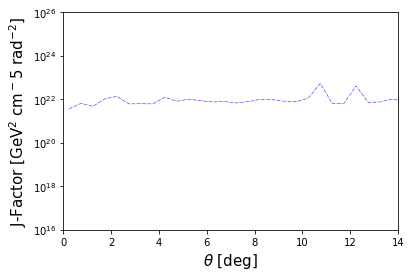

In [324]:

for w in range(1):

    latlon_r = np.sqrt(bin_middle_all_edgecut_deg[:,0]**2 + bin_middle_all_edgecut_deg[:,1]**2)
    #latlon_r_bins = np.linspace(0, max(latlon_r),25)
    latlon_r_bins = np.arange(0, max(latlon_r),0.5)
    
    
    yy_smooth_mw_bins_som = []
    yy_sub_mw_bins_som = []
    yy_smooth_m31_bins_som = []
    yy_sub_m31_bins_som = []
    yy_ext_bins_som = []
    
    yy_smooth_mw_bins_s = []
    yy_sub_mw_bins_s = []
    yy_smooth_m31_bins_s = []
    yy_sub_m31_bins_s = []
    yy_ext_bins_s = []
    
    
    yy_smooth_mw_bins_p = []
    yy_sub_mw_bins_p = []
    yy_smooth_m31_bins_p = []
    yy_sub_m31_bins_p = []
    yy_ext_bins_p = []
    
    yy_smooth_mw_bins_d = []
    yy_sub_mw_bins_d = []
    yy_smooth_m31_bins_d = []
    yy_sub_m31_bins_d = []
    yy_ext_bins_d = []
    
    
    
    

    for ii in range(len(latlon_r_bins)-1):
        start = latlon_r_bins[ii]
        end = latlon_r_bins[ii+1]
        
        #domega = 2*np.pi * (np.cos(np.radians(start)) - np.cos(np.radians(end)))
        
        
        area = np.radians(np.pi * (end**2 - start**2))
        
        
        
        
        
        #yy_ext_bins_som.append(np.nansum(yy_sub_all_ext[0][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_smooth_mw_bins_som.append(np.nansum(yy_smooth_all_mw[0][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_sub_mw_bins_som.append(np.nansum(yy_sub_all_mw[0][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_smooth_m31_bins_som.append(np.nansum(yy_smooth_m31[0][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_sub_m31_bins_som.append(np.nansum(yy_sub_all_m31[0][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        
        
        #yy_ext_bins_s.append(np.nanmean(yy_sub_all_ext[1][np.logical_and((latlon_r >= start), (latlon_r < end))])*area_2/area)
        '''
        yy_smooth_mw_bins_s.append(np.nanmean(yy_smooth_all_mw[1][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        yy_sub_mw_bins_s.append(np.nanmean(yy_sub_all_mw[1][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        yy_smooth_m31_bins_s.append(np.nanmean(yy_smooth_all_m31[1][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        yy_sub_m31_bins_s.append(np.nanmean(yy_sub_all_m31[1][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        '''
        yy_smooth_mw_bins_s.append(np.nanmean(yy_smooth_mw[np.logical_and((latlon_r >= start), (latlon_r < end))]))
        #yy_sub_mw_bins_s.append(np.nanmean(yy_sub_all_mw[1][np.logical_and((latlon_r >= start), (latlon_r < end))]))
        yy_smooth_m31_bins_s.append(np.nanmean(yy_smooth_m31[np.logical_and((latlon_r >= start), (latlon_r < end))]))
        #yy_sub_m31_bins_s.append(np.nanmean(yy_sub_all_m31[1][np.logical_and((latlon_r >= start), (latlon_r < end))]))

        
        
        
        
        #yy_ext_bins_p.append(np.nansum(yy_sub_all_ext[2][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_smooth_mw_bins_p.append(np.nansum(yy_smooth_all_mw[2][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_sub_mw_bins_p.append(np.nansum(yy_sub_all_mw[2][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_smooth_m31_bins_p.append(np.nansum(yy_smooth_all_m31[2][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_sub_m31_bins_p.append(np.nansum(yy_sub_all_m31[2][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)


        #yy_ext_bins_d.append(np.nansum(yy_sub_all_ext[3][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_smooth_mw_bins_d.append(np.nansum(yy_smooth_all_mw[3][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_sub_mw_bins_d.append(np.nansum(yy_sub_all_mw[3][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_smooth_m31_bins_d.append(np.nansum(yy_smooth_all_m31[3][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)
        #yy_sub_m31_bins_d.append(np.nansum(yy_sub_all_m31[3][np.logical_and((latlon_r >= start), (latlon_r < end))])/area)





    width = latlon_r_bins[1] - latlon_r_bins[0]
    latlon_r_bin_middles = [latlon_r_bins[h]+(latlon_r_bins[h+1] - latlon_r_bins[h])/2 for h in range(len(latlon_r_bins)-1)]


    lww = 1
    lwww = 0.5
    
    
    #plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_mw_bins_som))*conversion, 'r-', lw=lww)
    #plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_m31_bins_som))*conversion, 'r-.', lw=lwww)
    
    
    plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_mw_bins_s))*conversion, 'b-.', lw=lwww)
    #plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_mw_bins_s) + np.array(yy_sub_mw_bins_s))*conversion, 'b-.', lw=lww)
    plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_m31_bins_s))*conversion, 'b-', lw=lwww)
    #plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_m31_bins_s) + np.array(yy_sub_m31_bins_s))*conversion, 'b-', lw=lww)
    
    #plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_mw_bins_p))*conversion, 'y-', lw=lww)
    #plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_m31_bins_p))*conversion, 'y-.', lw=lwww)
    
    #plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_mw_bins_d))*conversion, 'g-', lw=lww)
    #plt.plot(latlon_r_bin_middles, (np.array(yy_smooth_m31_bins_d))*conversion, 'g-.', lw=lwww)
    
    
    
plt.yscale('log')

plt.xlim(0, 14)
plt.ylim(1e16, 1e26)


plt.ylabel(r'J-Factor [GeV$^2$ cm$^-5$ rad$^{-2}$]', fontsize=15)
plt.xlabel(r'$\theta$ [deg]', fontsize=15)

plt.show()

In [123]:
np.array([np.array(bin_middle_all_edgecut_deg[:,0]), np.array(bin_middle_all_edgecut_deg[:,1])])

array([[-15.75, -15.75, -15.75, ...,  15.75,  15.75,  15.75],
       [-15.75, -15.25, -14.75, ...,  14.75,  15.25,  15.75]])

In [135]:
bin_middle_all_edgecut_deg

array([[-15.75, -15.75],
       [-15.75, -15.25],
       [-15.75, -14.75],
       ...,
       [ 15.75,  14.75],
       [ 15.75,  15.25],
       [ 15.75,  15.75]])

In [128]:
latlon_r = []
for i in range(len(bin_middle_all_edgecut_deg)):
    latlon_r.append(np.linalg.norm(bin_middle_all_edgecut_deg[i]))

In [136]:

n = 0
for i in range(len(result)):
    for j in range(len(result[0])):
        n =n + 1

In [137]:
latlon_swave = []
for r in range(max(latlon_r)):
    latlon_swave.append(np.nanmean(result[]))

4096

In [435]:
x = np.arange(0, len(yy_smooth_m31))

x_bins = np.arange(0, max(x), 100)

temp = [np.nanmean(np.array(yy_smooth_m31)[np.logical_and((x >= x_bins[i]), (x < x_bins[i+1]))]) for i in range(len(x_bins)-1)]

temp_std = [np.nanstd(np.array(yy_smooth_m31)[np.logical_and((x >= x_bins[i]), (x < x_bins[i+1]))]) for i in range(len(x_bins)-1)]


x_bins = [x_bins[i] + (x_bins[1]-x_bins[0])/2 for i in range(len(x_bins)-1)]





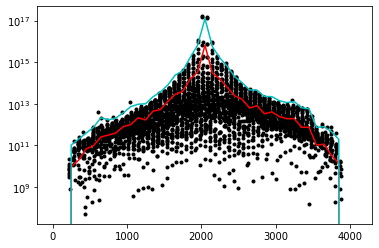

In [439]:
plt.plot(np.arange(0, len(yy_smooth_m31)), yy_smooth_m31, 'ko', ms=3)
plt.plot(x_bins, temp, 'r-', ms=3)
plt.plot(x_bins, np.array(temp) + 4*np.array(temp_std), 'c-', ms=3)
plt.yscale('log')
plt.show()

In [65]:
1e17 / (0.009)**2

1.234567901234568e+21

In [64]:
0.5 * np.pi / 180

0.008726646259971648

In [312]:
def mainhalo_density_func(output, halo_to_analyze, DMcoords_mainhalo_pyr, dm_mass):

    import time 
    
    start_time = time.time()
    
    voll_main_halo = voronoi_volumes(DMcoords_mainhalo_pyr)

    np.save(output + halo_to_analyze + '_voronoi_mainhalo.npy', voll_main_halo)
    
    print(time.time()-start_time)

    
    



In [313]:
def computeJFactorMaps_func(output, halo_to_analyze, subhalo_coords_galframe_pyr, DMcoords_mainhalo_pyr, ctr_m31_galframe, pixel_size_in_deg, rmax, vmax, distt, main_pyr_flag, sub_pyr_flag, solar_position, sub_cutt, main_cutt, big_sub, big_smooth):
    
    
    

    subhalo_I_files = np.load(output + halo_to_analyze + '_subhalo_jfactor_integrand.npz', allow_pickle = True)                         
    subhalo_I_s = subhalo_I_files['arr_1'][big_sub][sub_pyr_flag][sub_cutt]
    subhalo_I_p = subhalo_I_files['arr_2'][big_sub][sub_pyr_flag][sub_cutt]
    subhalo_I_d = subhalo_I_files['arr_3'][big_sub][sub_pyr_flag][sub_cutt]  
    subhalo_I_som = subhalo_I_files['arr_0'][big_sub][sub_pyr_flag][sub_cutt]
    
    
    
    mainhalo_I_files = np.load(output + halo_to_analyze + '_mainhalo_jfactor_integrand.npz', allow_pickle = True)                         
    mainhalo_I_s = mainhalo_I_files['arr_1'][main_pyr_flag][main_cutt]
    mainhalo_I_p = mainhalo_I_files['arr_2'][main_pyr_flag][main_cutt]
    mainhalo_I_d = mainhalo_I_files['arr_3'][main_pyr_flag][main_cutt]   
    mainhalo_I_som = mainhalo_I_files['arr_0'][main_pyr_flag][main_cutt]
    
    

    ### Transform poisitions to the Sun frame and convert to spherical coordinates

    from astropy.coordinates import cartesian_to_spherical
    
    
    
    
    subhalo_coords_galframe_pyr_ = subhalo_coords_galframe_pyr - np.array(solar_position)
    mainhalo_coords_galframe_pyr_ = DMcoords_mainhalo_pyr - np.array(solar_position)
    pyramid_midline = np.array([ctr_m31_galframe[0], ctr_m31_galframe[1], ctr_m31_galframe[2]]) - np.array(solar_position)
    #pyramid_midline = np.array([ctr_m31_galframe[0], ctr_m31_galframe[1], ctr_m31_galframe[2]])

    r_m31, lat_m31, lon_m31 = cartesian_to_spherical(pyramid_midline[0], pyramid_midline[1], pyramid_midline[2])
    r_m31 = r_m31.value
    lat_m31 = lat_m31.value 
    lon_m31 = lon_m31.value




    ### Converting to spherical coordinates

    subhalo_r, subhalo_lat, subhalo_lon = cartesian_to_spherical(subhalo_coords_galframe_pyr_[:,0], subhalo_coords_galframe_pyr_[:,1], subhalo_coords_galframe_pyr_[:,2])
    r = subhalo_r.value
    lat = subhalo_lat.value
    lon = subhalo_lon.value
    ### Putting M31 in the middle of line of sight


    subhalo_r = r
    #subhalo_lat = lat 
    #subhalo_lon = lon 
    subhalo_lat = lat - lat_m31
    subhalo_lat = subhalo_lat
    subhalo_lon = lon - lon_m31
    subhalo_lon = subhalo_lon





    mainhalo_r, mainhalo_lat, mainhalo_lon = cartesian_to_spherical(mainhalo_coords_galframe_pyr_[:,0], mainhalo_coords_galframe_pyr_[:,1], mainhalo_coords_galframe_pyr_[:,2])
    r = mainhalo_r.value
    lat = mainhalo_lat.value
    lon = mainhalo_lon.value
    ### Putting M31 in the middle of line of sight
    mainhalo_r = r
    #mainhalo_lat = lat 
    #mainhalo_lon = lon 
    mainhalo_lat = lat - lat_m31
    mainhalo_lat = mainhalo_lat
    mainhalo_lon = lon - lon_m31
    mainhalo_lon = mainhalo_lon


    

    #distt = np.linalg.norm(np.array(ctr_m31_galframe) - np.array([-8, 0, 0]))

    print('distt = ' , distt)


    pixel_size = np.radians(pixel_size_in_deg)


    theta_bin_width =pixel_size
    phi_bin_width = pixel_size


    #theta_range_min = min(mainhalo_lon) - np.radians(3)
    #phi_range_min = min(mainhalo_lon) - np.radians(3)
    #theta_range_max = max(mainhalo_lon) + np.radians(3)
    #phi_range_max = max(mainhalo_lon) + np.radians(3)

    theta_range_min = -np.radians(15) - np.radians(3)
    phi_range_min = -np.radians(15) - np.radians(3)
    theta_range_max = np.radians(15) + np.radians(3)
    phi_range_max = np.radians(15) + np.radians(3)



    
    print(theta_range_min)
    print(theta_range_max+theta_bin_width)
    print(theta_bin_width)


    

    theta_bin_edges = np.arange(theta_range_min, theta_range_max+theta_bin_width, theta_bin_width)
    phi_bin_edges = np.arange(phi_range_min, phi_range_max+phi_bin_width, phi_bin_width)




    num_of_pixels = len(theta_bin_edges)*len(phi_bin_edges)

    print('there are ' , num_of_pixels , ' pixels')
    
    
    

    subhalo_som_jfactor_smallpyr_total = []
    subhalo_s_jfactor_smallpyr_total = []
    subhalo_p_jfactor_smallpyr_total = []
    subhalo_d_jfactor_smallpyr_total = []

    mainhalo_som_jfactor_smallpyr_total = []
    mainhalo_s_jfactor_smallpyr_total = []
    mainhalo_p_jfactor_smallpyr_total = []
    mainhalo_d_jfactor_smallpyr_total = []

    bin_middle_all = []

    n = 0

    import time



    time_list = []
    
    
    print(len(mainhalo_lat))



    for theta_i in range(len(theta_bin_edges)-1):
        for phi_i in range(len(phi_bin_edges)-1):



            start_time = time.time()


            if (n%1000 == 0 and n > 10) or n == 50:

                print('')
                print('Estimated time remaining: ' , round(((num_of_pixels-n)*np.mean(time_list)) / 60, 1) , ' minutes.')



            n = n + 1



            bin_middle = [theta_bin_edges[theta_i] + theta_bin_width/2, phi_bin_edges[phi_i] + phi_bin_width/2]



            bin_middle_all.append(bin_middle)


            mainhalo_small_pyramid = np.logical_and(np.logical_and(mainhalo_lat >= theta_bin_edges[theta_i], mainhalo_lat <= theta_bin_edges[theta_i + 1]), np.logical_and(mainhalo_lon >= phi_bin_edges[phi_i], mainhalo_lon <= phi_bin_edges[phi_i + 1]))

            subhalo_small_pyramid = np.logical_and(np.logical_and(subhalo_lat >= theta_bin_edges[theta_i], subhalo_lat <= theta_bin_edges[theta_i + 1]), np.logical_and(subhalo_lon >= phi_bin_edges[phi_i], subhalo_lon <= phi_bin_edges[phi_i + 1]))


            
            
            subhalo_r_pyr = subhalo_r[subhalo_small_pyramid]
            subhalo_I_som_pyr = subhalo_I_som[subhalo_small_pyramid]
            subhalo_I_s_pyr = subhalo_I_s[subhalo_small_pyramid]
            subhalo_I_p_pyr = subhalo_I_p[subhalo_small_pyramid]
            subhalo_I_d_pyr = subhalo_I_d[subhalo_small_pyramid]
            
            
            mainhalo_r_pyr = mainhalo_r[mainhalo_small_pyramid]
            mainhalo_I_som_pyr = mainhalo_I_som[mainhalo_small_pyramid]
            mainhalo_I_s_pyr = mainhalo_I_s[mainhalo_small_pyramid]
            mainhalo_I_p_pyr = mainhalo_I_p[mainhalo_small_pyramid]
            mainhalo_I_d_pyr = mainhalo_I_d[mainhalo_small_pyramid]
            
            
            '''
            if fore_or_back == 'back':
            
                l_bins = np.arange(500, 1500, 3)
                
                
            elif fore_or_back == 'ext':
                
                l_bins = np.arange(0, 1500, 3)
                
            else:
                l_bins = np.arange(0, 300, 3)
            '''
            
            
            l_bins = np.arange(0, 1600, 3)
            
            
            dl = l_bins[1] - l_bins[0] 
                
                
                
            
            subhalo_som_jfactor_smallpyr = []
            subhalo_s_jfactor_smallpyr = []
            subhalo_p_jfactor_smallpyr = []
            subhalo_d_jfactor_smallpyr = []

            mainhalo_som_jfactor_smallpyr = []
            mainhalo_s_jfactor_smallpyr = []
            mainhalo_p_jfactor_smallpyr = []
            mainhalo_d_jfactor_smallpyr = []
                
                
            for l_index in range(len(l_bins)-1):
                l_sub_cut = np.logical_and((subhalo_r_pyr >= l_bins[l_index]), (subhalo_r_pyr < l_bins[l_index+1]))
                l_main_cut = np.logical_and((mainhalo_r_pyr >= l_bins[l_index]), (mainhalo_r_pyr < l_bins[l_index+1]))
                
                
                '''
                subhalo_som_jfactor_smallpyr.append(np.nansum(subhalo_I_som_pyr[l_sub_cut])*dl)
                subhalo_s_jfactor_smallpyr.append(np.nansum(subhalo_I_s_pyr[l_sub_cut])*dl)
                subhalo_p_jfactor_smallpyr.append(np.nansum(subhalo_I_p_pyr[l_sub_cut])*dl)
                subhalo_d_jfactor_smallpyr.append(np.nansum(subhalo_I_d_pyr[l_sub_cut])*dl)
            
            
                mainhalo_som_jfactor_smallpyr.append(np.nansum(mainhalo_I_som_pyr[l_main_cut])*dl)
                mainhalo_s_jfactor_smallpyr.append(np.nansum(mainhalo_I_s_pyr[l_main_cut])*dl)
                mainhalo_p_jfactor_smallpyr.append(np.nansum(mainhalo_I_p_pyr[l_main_cut])*dl)
                mainhalo_d_jfactor_smallpyr.append(np.nansum(mainhalo_I_d_pyr[l_main_cut])*dl)
                '''
                
                
                subhalo_som_jfactor_smallpyr.append(np.nanmean(subhalo_I_som_pyr[l_sub_cut])*dl)
                subhalo_s_jfactor_smallpyr.append(np.nanmean(subhalo_I_s_pyr[l_sub_cut])*dl)
                subhalo_p_jfactor_smallpyr.append(np.nanmean(subhalo_I_p_pyr[l_sub_cut])*dl)
                subhalo_d_jfactor_smallpyr.append(np.nanmean(subhalo_I_d_pyr[l_sub_cut])*dl)
            
            
                mainhalo_som_jfactor_smallpyr.append(np.nanmean(mainhalo_I_som_pyr[l_main_cut])*dl)
                mainhalo_s_jfactor_smallpyr.append(np.nanmean(mainhalo_I_s_pyr[l_main_cut])*dl)
                mainhalo_p_jfactor_smallpyr.append(np.nanmean(mainhalo_I_p_pyr[l_main_cut])*dl)
                mainhalo_d_jfactor_smallpyr.append(np.nanmean(mainhalo_I_d_pyr[l_main_cut])*dl)
            
            
            
            
            #print(min(mainhalo_som_jfactor_smallpyr))
            #print(max(mainhalo_som_jfactor_smallpyr))
            #print('')
        
            subhalo_som_jfactor_smallpyr_total.append(np.nansum(subhalo_som_jfactor_smallpyr))
            subhalo_s_jfactor_smallpyr_total.append(np.nansum(subhalo_s_jfactor_smallpyr))
            subhalo_p_jfactor_smallpyr_total.append(np.nansum(subhalo_p_jfactor_smallpyr))
            subhalo_d_jfactor_smallpyr_total.append(np.nansum(subhalo_d_jfactor_smallpyr))

            mainhalo_som_jfactor_smallpyr_total.append(np.nansum(mainhalo_som_jfactor_smallpyr))
            mainhalo_s_jfactor_smallpyr_total.append(np.nansum(mainhalo_s_jfactor_smallpyr))
            mainhalo_p_jfactor_smallpyr_total.append(np.nansum(mainhalo_p_jfactor_smallpyr))
            mainhalo_d_jfactor_smallpyr_total.append(np.nansum(mainhalo_d_jfactor_smallpyr))





            time_list.append(time.time()-start_time)

            if n % 1000 == 0:
                print('.' , end = '')



    print('bin middle length, ' , len(bin_middle_all))
    #print(bin_middle_all)


    ### Chopping off the edges where there are pixels with underestimated flux values

    
    #chop_amount = np.radians(2)
    chop_amount = np.radians(2)

    bin_middle_all = np.array(bin_middle_all)

    #print(-opening_angle+chop_amount)

    edge_cut = np.logical_and((np.logical_and((bin_middle_all[:,0] >= -opening_angle+chop_amount), (bin_middle_all[:,0] < opening_angle-chop_amount))),np.logical_and((bin_middle_all[:,1] >= -opening_angle+chop_amount), (bin_middle_all[:,1] < opening_angle-chop_amount)))

    #print(edge_cut)
    
    
    #print(-opening_angle+chop_amount)
    #print(bin_middle_all[:,0])




    bin_middle_all_edgecut = bin_middle_all[edge_cut]


    mainhalo_som_jfactor_smallpyr_total_edgecut = np.array(mainhalo_som_jfactor_smallpyr_total)[edge_cut]
    mainhalo_s_jfactor_smallpyr_total_edgecut = np.array(mainhalo_s_jfactor_smallpyr_total)[edge_cut]
    mainhalo_p_jfactor_smallpyr_total_edgecut = np.array(mainhalo_p_jfactor_smallpyr_total)[edge_cut]
    mainhalo_d_jfactor_smallpyr_total_edgecut = np.array(mainhalo_d_jfactor_smallpyr_total)[edge_cut]


    subhalo_som_jfactor_smallpyr_total_edgecut = np.array(subhalo_som_jfactor_smallpyr_total)[edge_cut]
    subhalo_s_jfactor_smallpyr_total_edgecut = np.array(subhalo_s_jfactor_smallpyr_total)[edge_cut]
    subhalo_p_jfactor_smallpyr_total_edgecut = np.array(subhalo_p_jfactor_smallpyr_total)[edge_cut]
    subhalo_d_jfactor_smallpyr_total_edgecut = np.array(subhalo_d_jfactor_smallpyr_total)[edge_cut]




    #### Converting jfactor map bins to degrees

    bin_middle_all_edgecut_deg = bin_middle_all_edgecut*(180/np.pi)


    
    print('bin middle length, ' , len(bin_middle_all_edgecut))
    
    
    
    
    return pixel_size, distt, bin_middle_all_edgecut_deg, mainhalo_som_jfactor_smallpyr_total_edgecut, mainhalo_s_jfactor_smallpyr_total_edgecut, mainhalo_p_jfactor_smallpyr_total_edgecut, mainhalo_d_jfactor_smallpyr_total_edgecut, subhalo_som_jfactor_smallpyr_total_edgecut, subhalo_s_jfactor_smallpyr_total_edgecut, subhalo_p_jfactor_smallpyr_total_edgecut, subhalo_d_jfactor_smallpyr_total_edgecut


